# Import the libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# reading the records


In [ ]:
data = pd.read_csv('/content/Churn_ Data.csv')

#Inspect data

In [ ]:
data.head()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0          -0.17                 1  ...                    0.454642   
1          -0.32                 3  ...                    0.343190   
2          -0.05                 3  ...                    0.101838   
3          -0.18                 4  ...                    0.066602   
4           0.01                 4  ...                    0.219821   

   prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0            0.497397                 4                  0   
1            0.767617                 6                  0   
2            0.619034                 6                  1   
3            0.437088                 7                  2   
4            0.585977                 6                  1   

   s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0                   9              6.02           8.20           46.465636   
1                  20              3.66           8.10           34.525456   
2                  19              4.33           4.36           10.298451   
3                  11              3.40           3.53            6.670783   
4                  14              3.85           3.87           21.998905   

   prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
0                    0.609456       0.22  
1                    1.000000       0.38  
2                    0.699592       0.11  
3                    0.086617       5.18  
4                    0.683105       0.10  

[5 rows x 111 columns]

In [ ]:
data.tail()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
24995              5                 8          26.67           123.396   
24996              2                 8          27.88            62.140   
24997              6                10          10.00            98.900   
24998              7                67          42.92           734.005   
24999              1                 1          53.50           250.340   

       s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
24995          -0.16                 4  ...                    0.145831   
24996           0.19                 4  ...                    0.529829   
24997          -0.03                 2  ...                    0.327245   
24998           0.70                 4  ...                    0.824671   
24999          -0.48                 4  ...                    0.377281   

       prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
24995            0.200151                 7                  0   
24996            0.169835                 7                  0   
24997            0.407944                 3                  0   
24998            0.889239                 7                  1   
24999            0.609046                 7                  0   

       s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  \
24995                  18              3.57           3.83   
24996                  18              6.89           7.70   
24997                  12              6.63           7.48   
24998                   1             19.36          22.26   
24999                  18              5.42           8.02   

       prop.og.mou.any.p6  prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
24995           14.896154                    0.328027       0.76  
24996           55.156230                    0.288006      12.74  
24997           33.222018                    0.235918       8.07  
24998           82.549378                    0.952962      21.21  
24999           38.590040                    1.000000       0.00  

[5 rows x 111 columns]

In [ ]:
data.describe()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
count      25000.000000   25000.000000      25000.000000       25000.000000   
mean          -0.003730     281.073083          4.890003           7.070194   
std            2.727916     276.075983          4.212452           6.318992   
min           -1.000000       0.000000          0.000000           0.000833   
25%           -0.580000     101.563800          2.367288           3.318825   
50%           -0.170000     204.859600          3.729944           5.231268   
75%            0.280000     370.711650          5.993342           8.395736   
max          316.860000    5702.924300        153.221695         170.200441   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
count   25000.000000      25000.000000   25000.000000      25000.000000   
mean        5.460080         28.532520      72.208906        218.517937   
std         2.184444         28.061435      67.921490        231.321064   
min         0.000000          0.000000       0.000000          0.000000   
25%         5.000000          9.000000      33.000000         74.420000   
50%         7.000000         21.000000      52.260000        151.168500   
75%         7.000000         39.000000      89.852500        284.265000   
max         7.000000        622.000000    2249.000000       3767.565000   

       s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
count   25000.000000      25000.000000  ...                25000.000000   
mean       -0.028327          3.254720  ...                    0.538407   
std         0.354573          1.193271  ...                    0.209203   
min        -5.090000          0.000000  ...                    0.000000   
25%        -0.160000          3.000000  ...                    0.394227   
50%        -0.020000          4.000000  ...                    0.539354   
75%         0.110000          4.000000  ...                    0.682695   
max         5.000000          4.000000  ...                    1.000000   

       prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
count        25000.000000      25000.000000       25000.000000   
mean             0.485523          5.731280           1.797320   
std              0.271146          1.936848           3.048943   
min              0.000000          0.000000           0.000000   
25%              0.274034          5.000000           0.000000   
50%              0.476759          7.000000           0.000000   
75%              0.694104          7.000000           2.000000   
max              1.000000          7.000000          14.000000   

       s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  \
count        25000.000000      25000.000000   25000.000000   
mean             8.382160          8.008660      12.540182   
std              8.961016          6.152429      11.540611   
min              0.000000          0.000000       0.000000   
25%              1.000000          4.207500       6.167500   
50%              5.000000          6.345000       9.350000   
75%             14.000000          9.830000      14.620000   
max             30.000000        171.780000     386.480000   

       prop.og.mou.any.p6  prop.loc.i2i.mou.og.mou.p3     s3.rev.p1  
count        25000.000000                25000.000000  25000.000000  
mean            53.594165                    0.483975      9.951366  
std             21.408486                    0.292349     17.648128  
min              0.000000                    0.000000      0.000000  
25%             39.378142                    0.251304      1.970000  
50%             53.976203                    0.477621      5.380000  
75%             68.312416                    0.716538     11.400000  
max            100.000000                    1.000000    585.500000  

[8 rows x 111 columns]

# Data Types and Statistics

In [ ]:
data.select_dtypes(include=[np.number])

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0                  4                14          39.29            57.320   
1                  1                 2          21.67            38.700   
2                  2                 3          30.00            15.320   
3                  2                 3          50.00            51.956   
4                  3                 2          22.50            66.886   
...              ...               ...            ...               ...   
24995              5                 8          26.67           123.396   
24996              2                 8          27.88            62.140   
24997              6                10          10.00            98.900   
24998              7                67          42.92           734.005   
24999              1                 1          53.50           250.340   

       s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0              -0.17                 1  ...                    0.454642   
1              -0.32                 3  ...                    0.343190   
2              -0.05                 3  ...                    0.101838   
3              -0.18                 4  ...                    0.066602   
4               0.01                 4  ...                    0.219821   
...              ...               ...  ...                         ...   
24995          -0.16                 4  ...                    0.145831   
24996           0.19                 4  ...                    0.529829   
24997          -0.03                 2  ...                    0.327245   
24998           0.70                 4  ...                    0.824671   
24999          -0.48                 4  ...                    0.377281   

       prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0                0.497397                 4                  0   
1                0.767617                 6                  0   
2                0.619034                 6                  1   
3                0.437088                 7                  2   
4                0.585977                 6                  1   
...                   ...               ...                ...   
24995            0.200151                 7                  0   
24996            0.169835                 7                  0   
24997            0.407944                 3                  0   
24998            0.889239                 7                  1   
24999            0.609046                 7                  0   

       s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  \
0                       9              6.02           8.20   
1                      20              3.66           8.10   
2                      19              4.33           4.36   
3                      11              3.40           3.53   
4                      14              3.85           3.87   
...                   ...               ...            ...   
24995                  18    

In [ ]:
data.quantile([0.25, 0.5, 0.75])

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0.25             -0.58      101.56380          2.367288           3.318825   
0.50             -0.17      204.85960          3.729944           5.231268   
0.75              0.28      370.71165          5.993342           8.395736   

      s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0.25            5.0               9.0        33.0000           74.4200   
0.50            7.0              21.0        52.2600          151.1685   
0.75            7.0              39.0        89.8525          284.2650   

      s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0.25          -0.16               3.0  ...                    0.394227   
0.50          -0.02               4.0  ...                    0.539354   
0.75           0.11               4.0  ...                    0.682695   

      prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0.25            0.274034               5.0                0.0   
0.50            0.476759               7.0                0.0   
0.75            0.694104               7.0                2.0   

      s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0.25                 1.0            4.2075         6.1675           39.378142   
0.50                 5.0            6.3450         9.3500           53.976203   
0.75                14.0            9.8300        14.6200           68.312416   

      prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
0.25                    0.251304       1.97  
0.50                    0.477621       5.38  
0.75                    0.716538      11.40  

[3 rows x 111 columns]

In [ ]:
data.mean()

s6.new.rev.p2.m2               -0.003730
s1.new.rev.m1                 281.073083
s3.og.rev.4db.p5                4.890003
s3.new.rev.4db.p5               7.070194
s4.usg.ins.p2                   5.460080
                                 ...    
s3.og.rev.all.m2                8.008660
s3.new.rev.m2                  12.540182
prop.og.mou.any.p6             53.594165
prop.loc.i2i.mou.og.mou.p3      0.483975
s3.rev.p1                       9.951366
Length: 111, dtype: float64

# Step 2: Remove Duplicate Records

In [ ]:
data.var()

s6.new.rev.p2.m2                  7.441525
s1.new.rev.m1                 76217.948583
s3.og.rev.4db.p5                 17.744755
s3.new.rev.4db.p5                39.929662
s4.usg.ins.p2                     4.771797
                                  ...     
s3.og.rev.all.m2                 37.852383
s3.new.rev.m2                   133.185705
prop.og.mou.any.p6              458.323270
prop.loc.i2i.mou.og.mou.p3        0.085468
s3.rev.p1                       311.456423
Length: 111, dtype: float64

In [ ]:
data.median()

s6.new.rev.p2.m2               -0.170000
s1.new.rev.m1                 204.859600
s3.og.rev.4db.p5                3.729944
s3.new.rev.4db.p5               5.231268
s4.usg.ins.p2                   7.000000
                                 ...    
s3.og.rev.all.m2                6.345000
s3.new.rev.m2                   9.350000
prop.og.mou.any.p6             53.976203
prop.loc.i2i.mou.og.mou.p3      0.477621
s3.rev.p1                       5.380000
Length: 111, dtype: float64

# Convert Object Columns to Numeric

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object' and data[col].str.isnumeric().all():
        data[col] = pd.to_numeric(data[col], errors='coerce')
    elif data[col].dtype == 'int64' and len(data[col].unique()) < 10:
        data[col] = data[col].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: category(13), float64(80), int64(18)
memory usage: 19.0 MB
None


# Check for Duplicates


In [ ]:
# Check for duplicate values
duplicate_rows = data.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f'Number of duplicate rows: {num_duplicates}')

# If there are duplicate rows, print some of them to inspect
if num_duplicates > 0:
    print('Duplicate rows:')
    print(data[duplicate_rows].head())

# Drop duplicate rows if any
data = data.drop_duplicates()

# Print the shape of the dataset after dropping duplicates
print(f'Shape of the dataset after dropping duplicates: {data.shape}')

Number of duplicate rows: 0
Shape of the dataset after dropping duplicates: (25000, 111)


# Remove Unique Value Variables

In [ ]:
data = data.drop_duplicates()
print(data)

       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

      s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p

In [ ]:
unique_counts = data.nunique()
data = data.drop(columns=unique_counts[unique_counts == len(data)].index)

# Remove Zero Variance Variables

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
zero_var = numeric_data.var()
zero_var_columns = zero_var[zero_var == 0].index
data = data.drop(columns=zero_var_columns)


# Outlier Treatment

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))
numeric_data[outliers] = np.nan  # Or apply capping/flooring
data.update(numeric_data)

In [ ]:
z_scores = np.abs(stats.zscore(numeric_data))
outliers = (z_scores > 3)
numeric_data[outliers] = np.nan  # Or apply capping/flooring
data.update(numeric_data)

# Missing Value Treatment

In [ ]:
threshold = 0.05 * len(data.columns)
data = data.dropna(thresh=threshold)

In [ ]:
data = data.dropna(axis=1, thresh=0.5 * len(data))

In [ ]:
# Impute missing values
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].median())

for col in data.select_dtypes(include=['category', 'object']).columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Remove Highly Correlated Variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

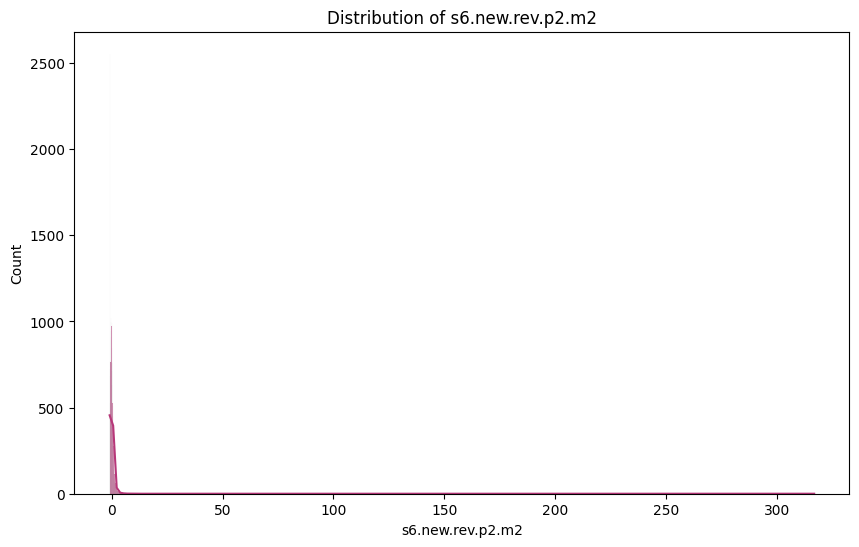

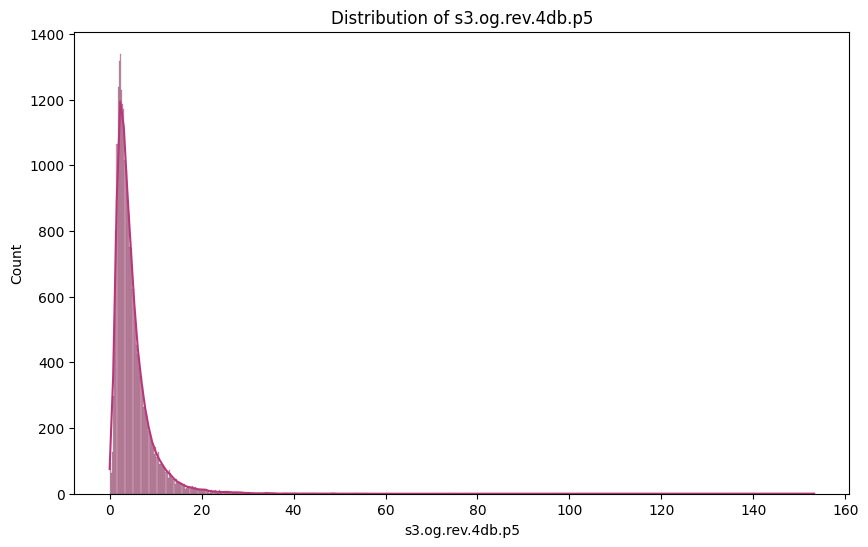

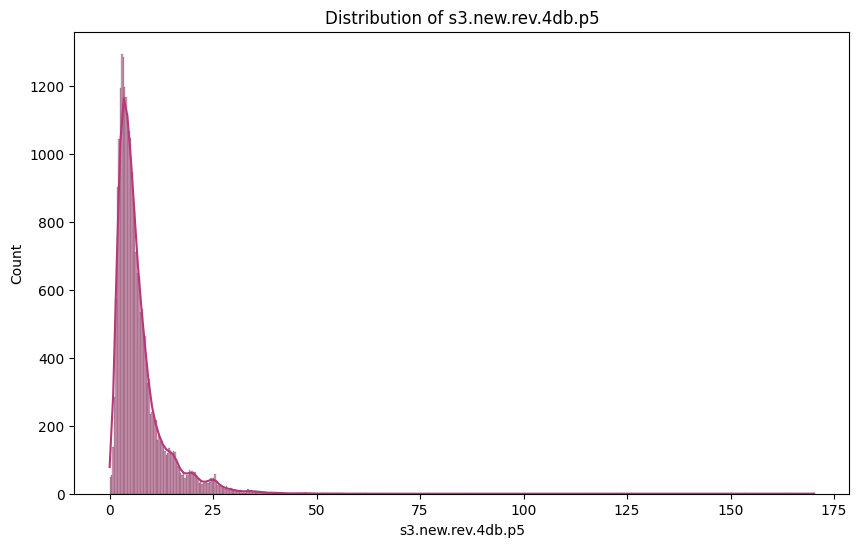

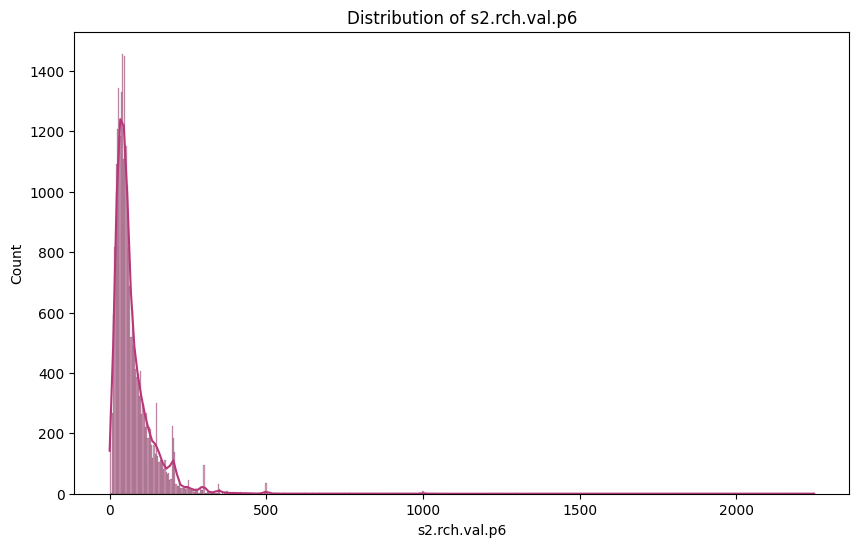

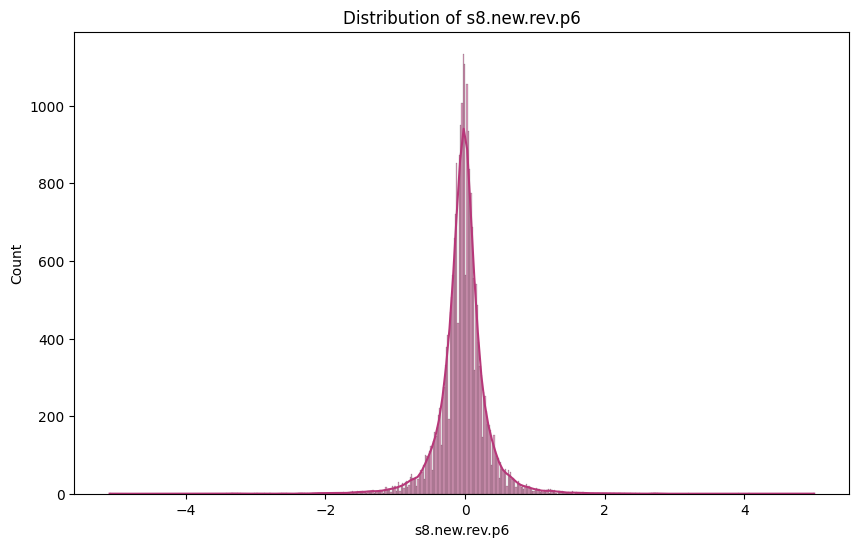

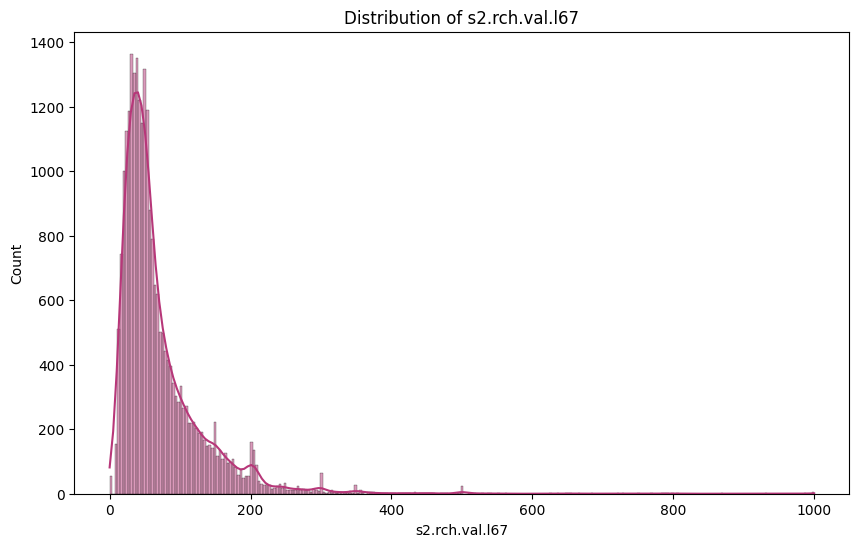

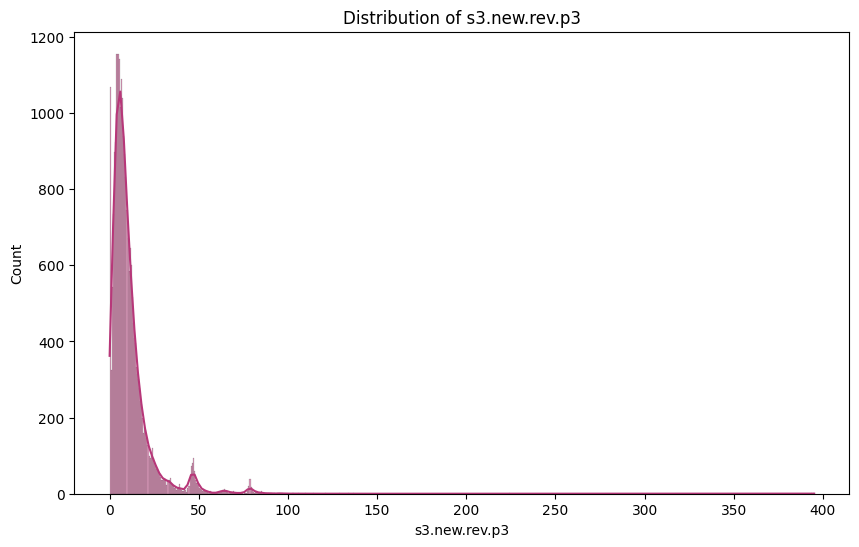

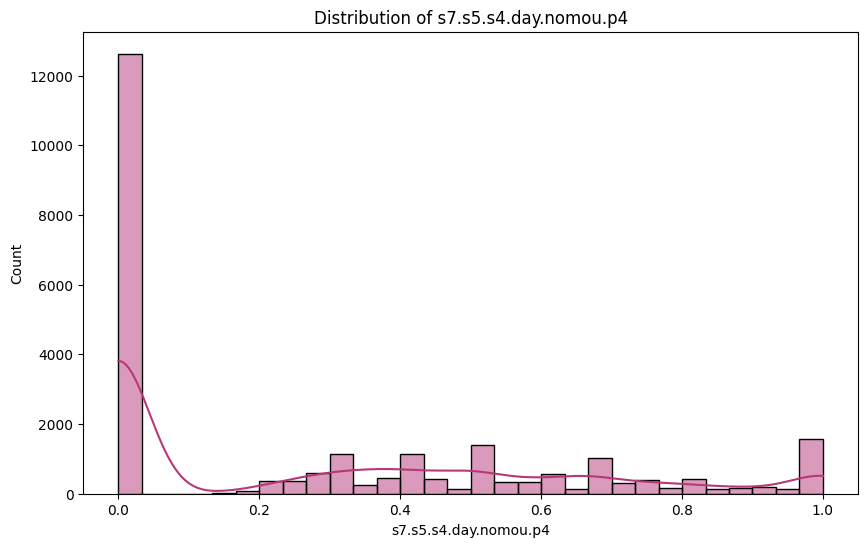

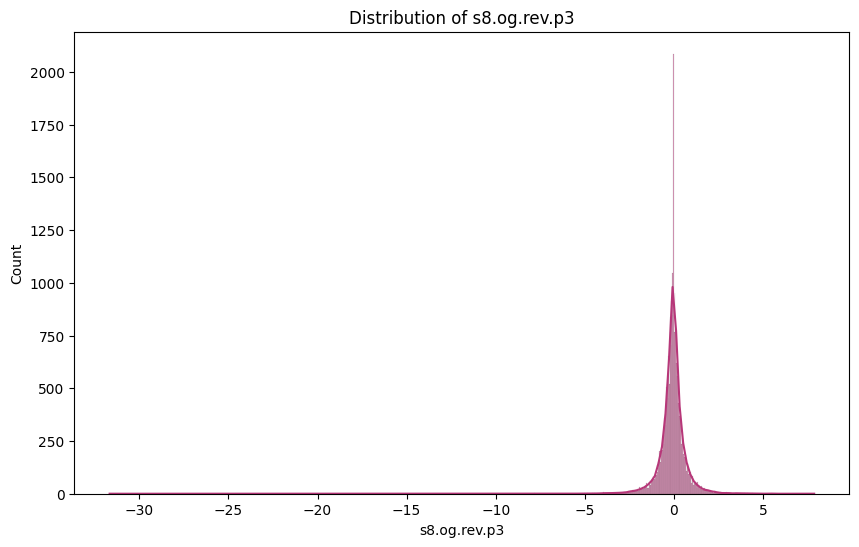

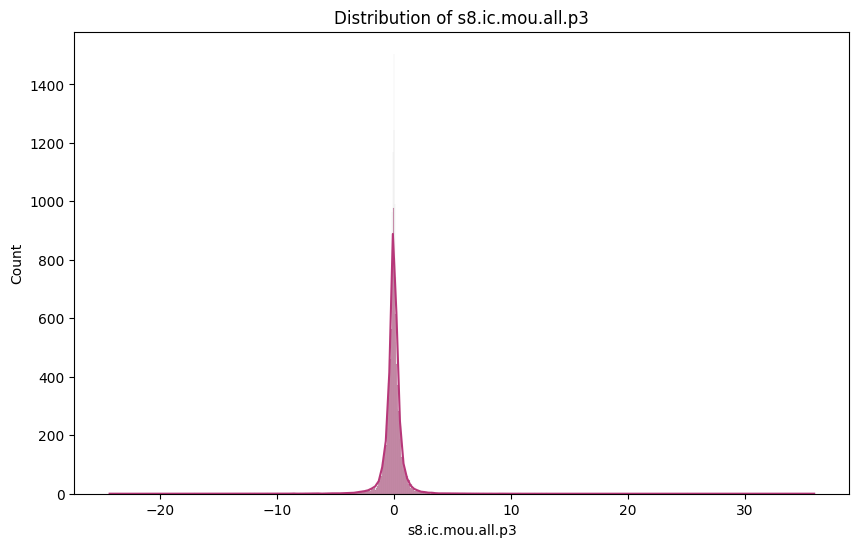

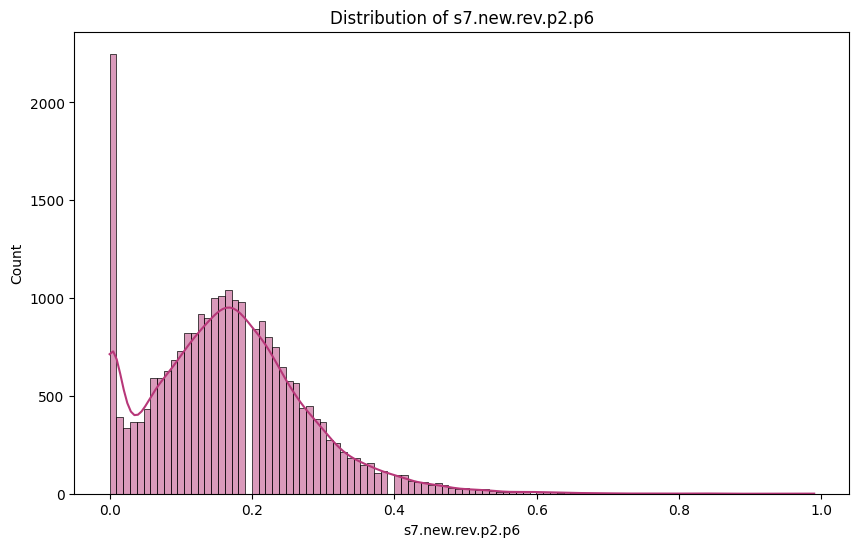

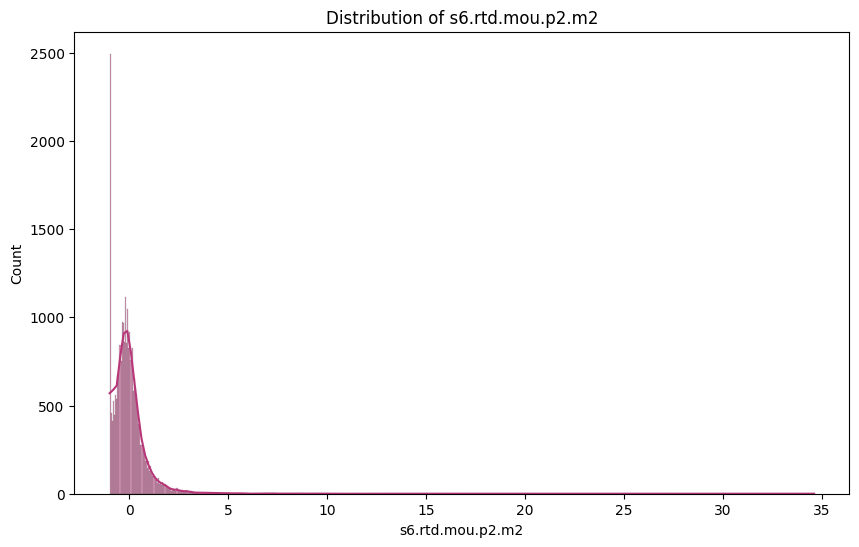

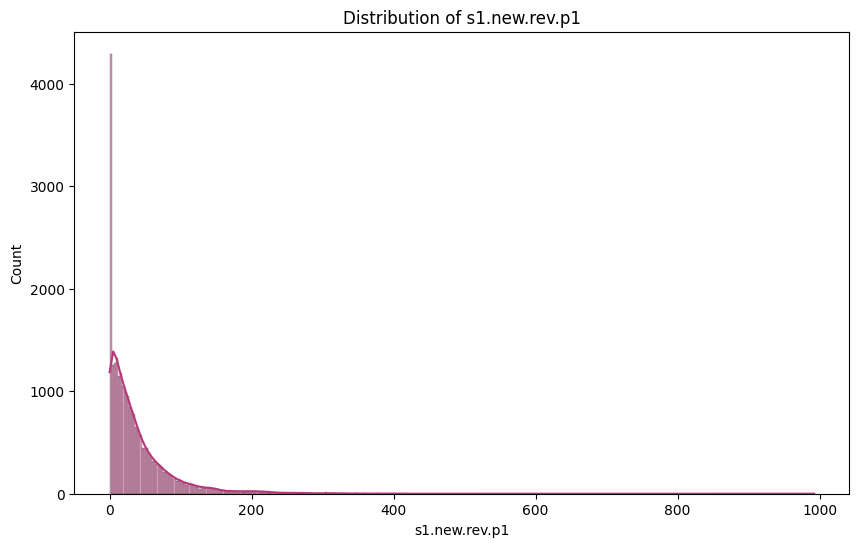

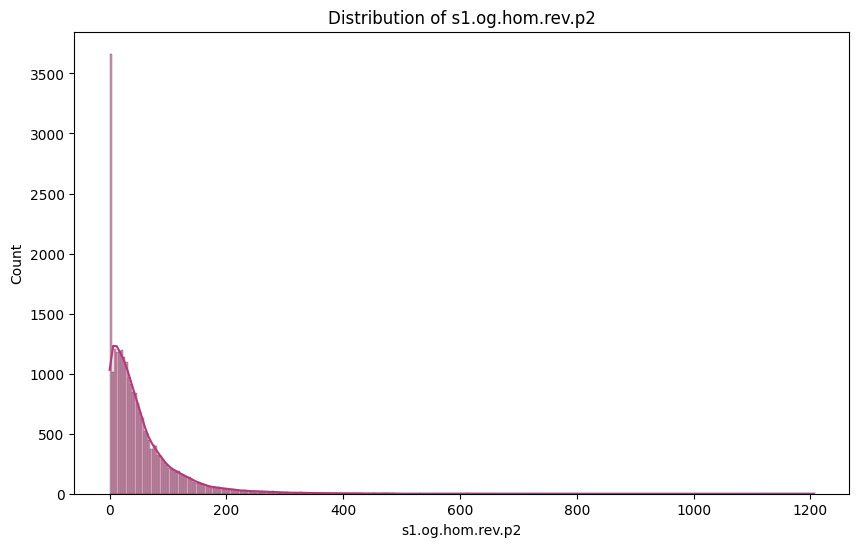

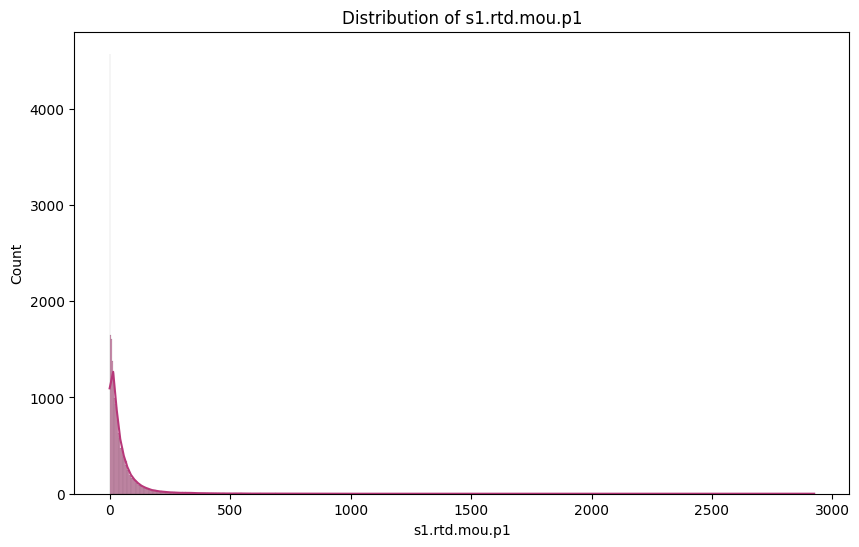

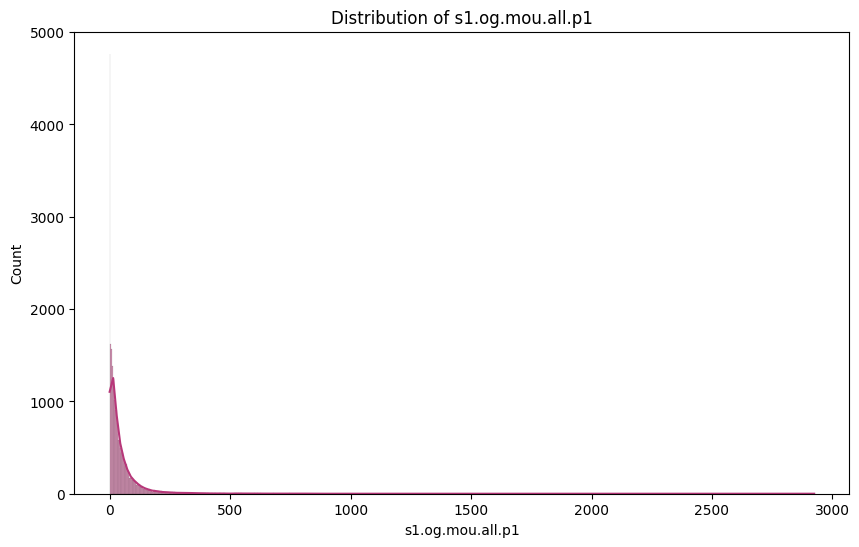

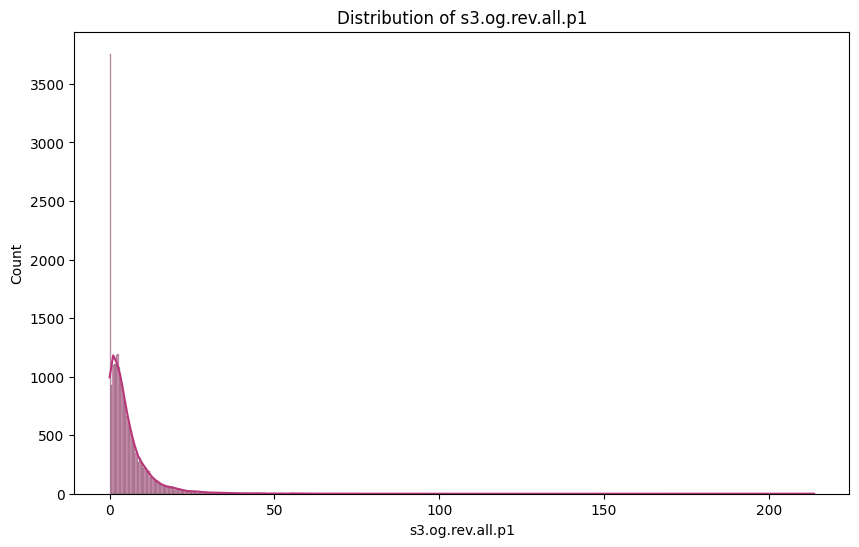

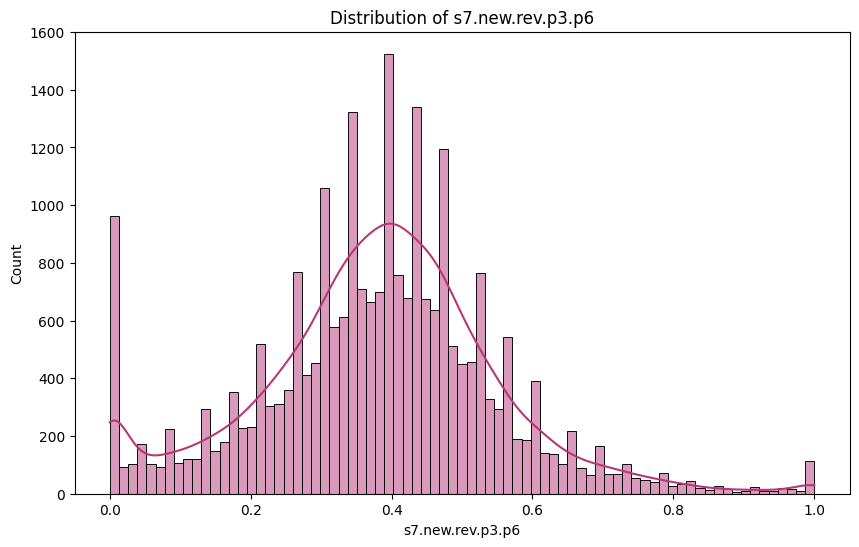

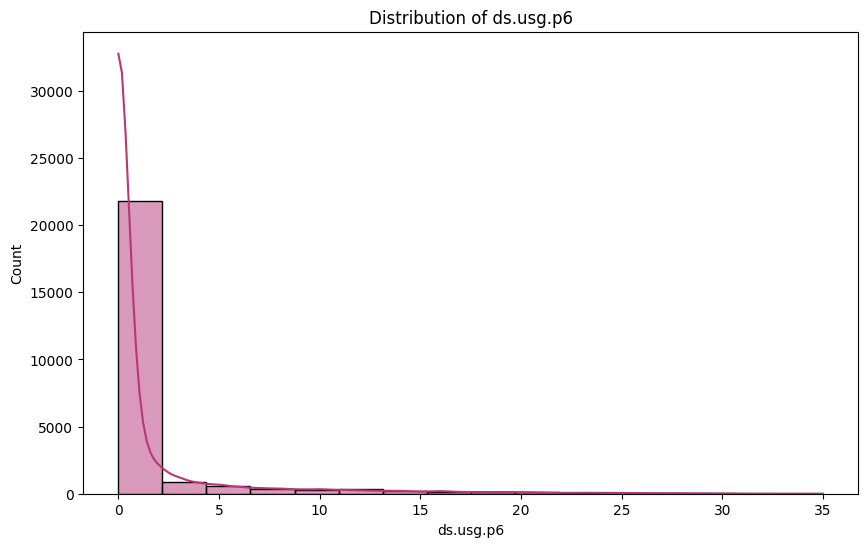

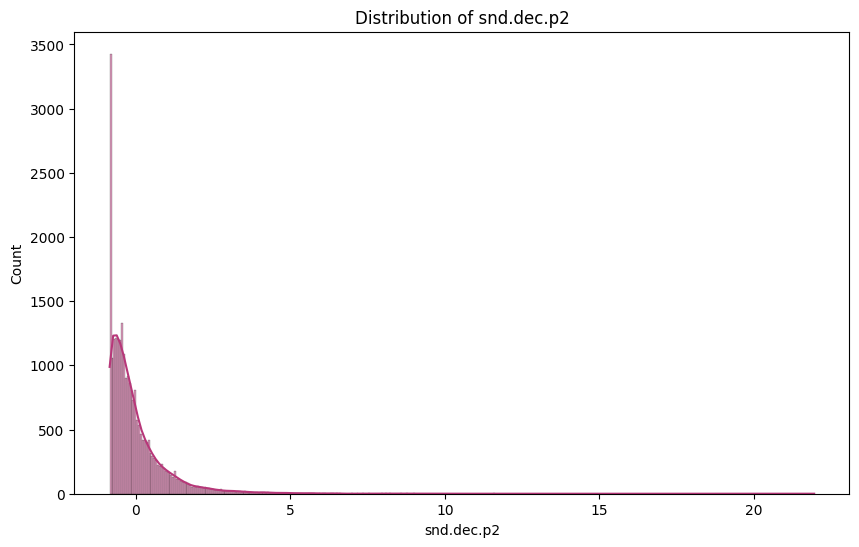

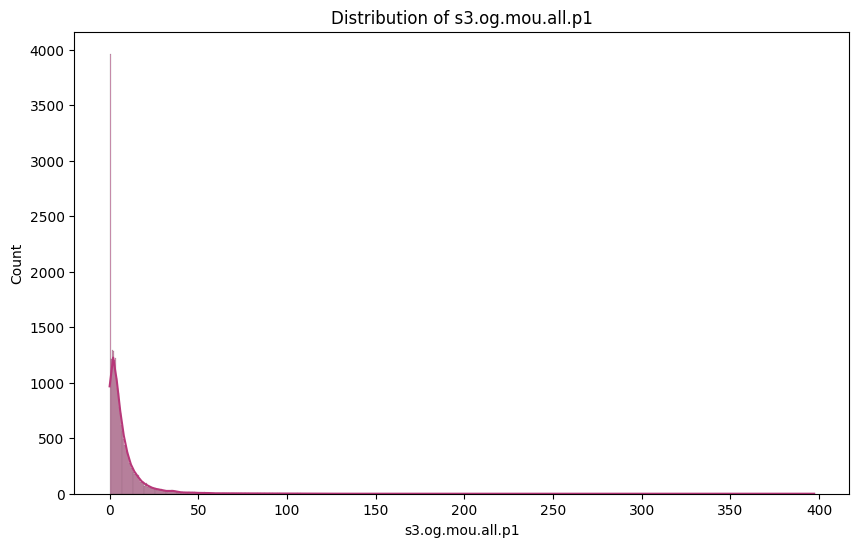

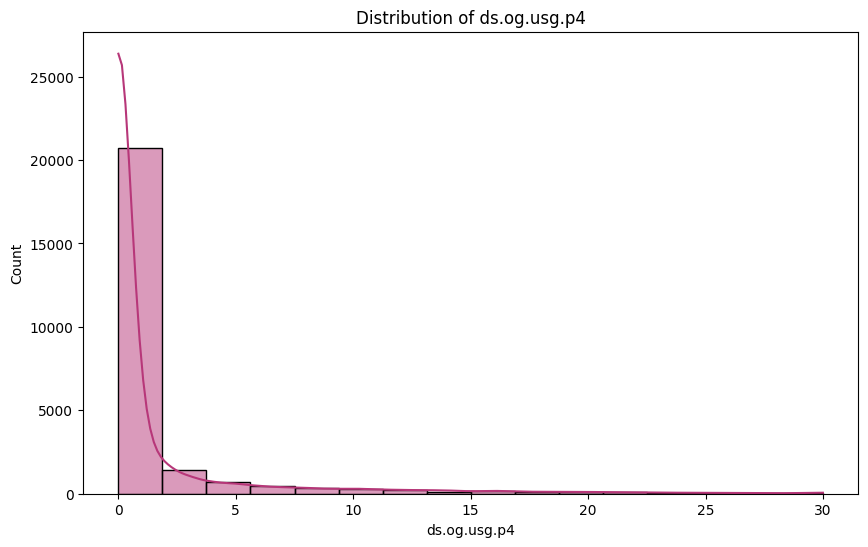

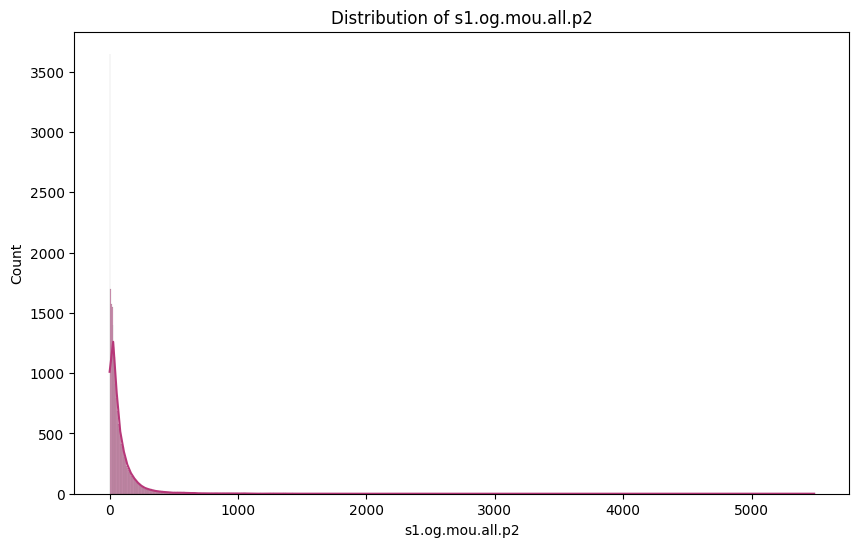

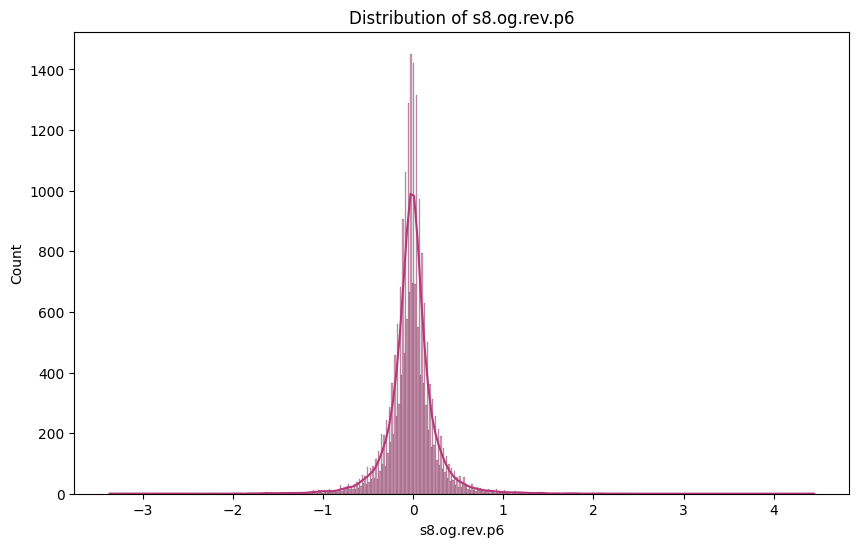

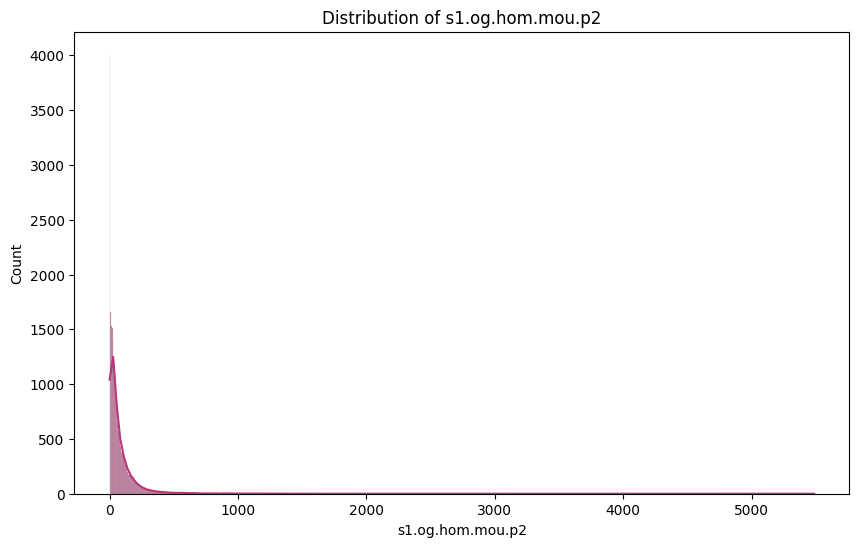

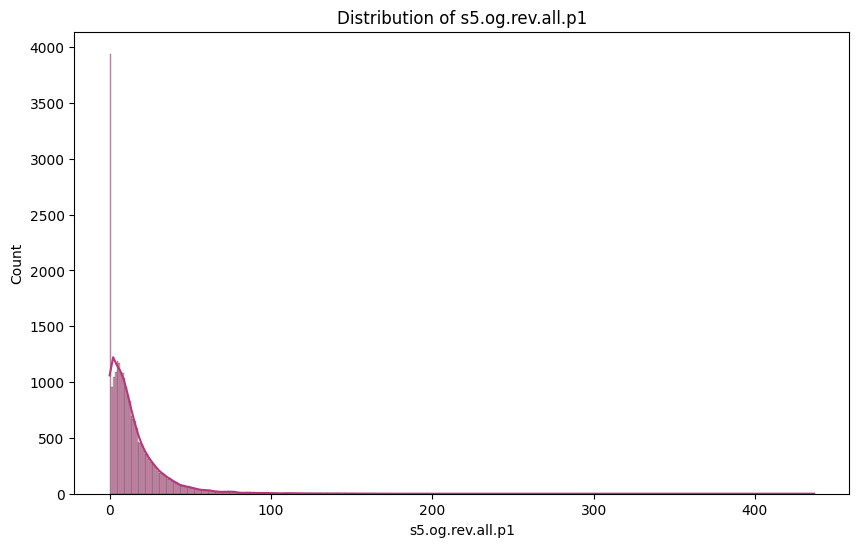

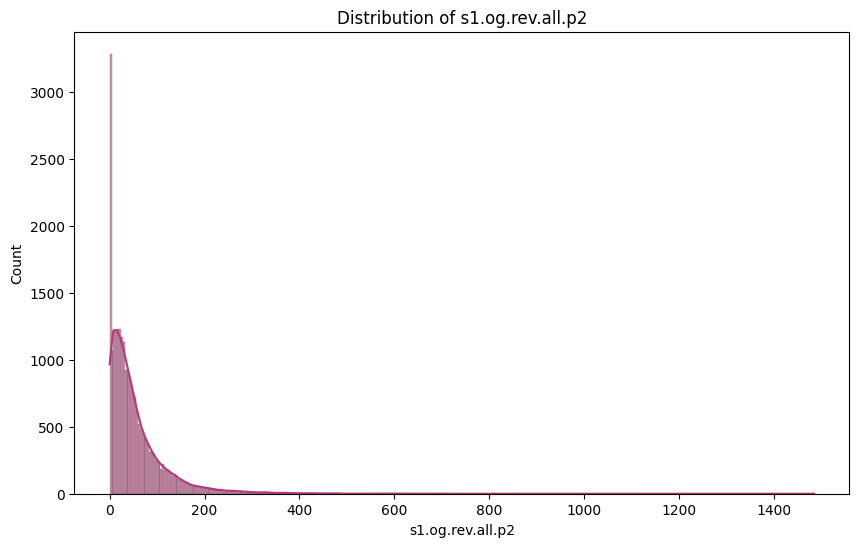

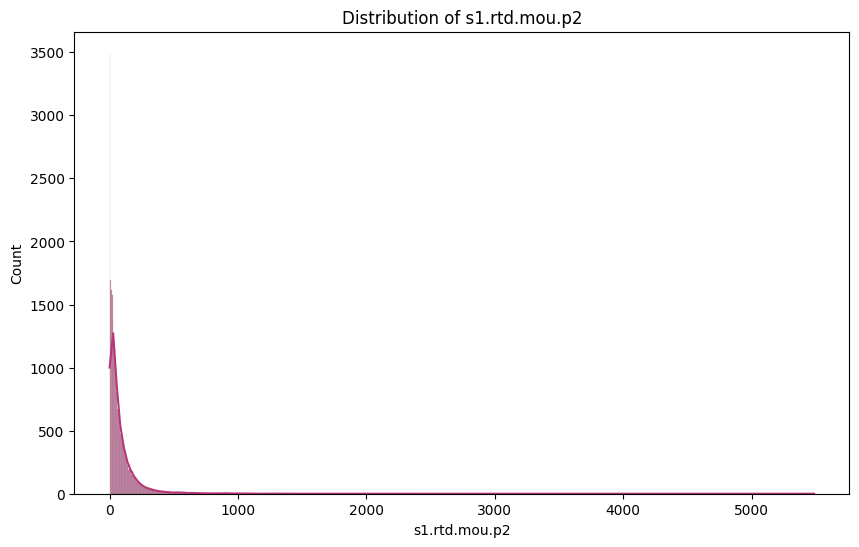

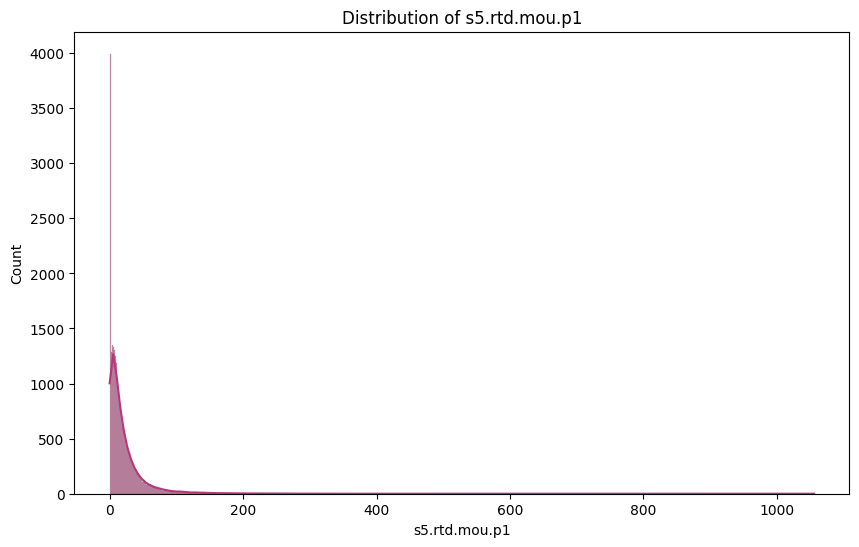

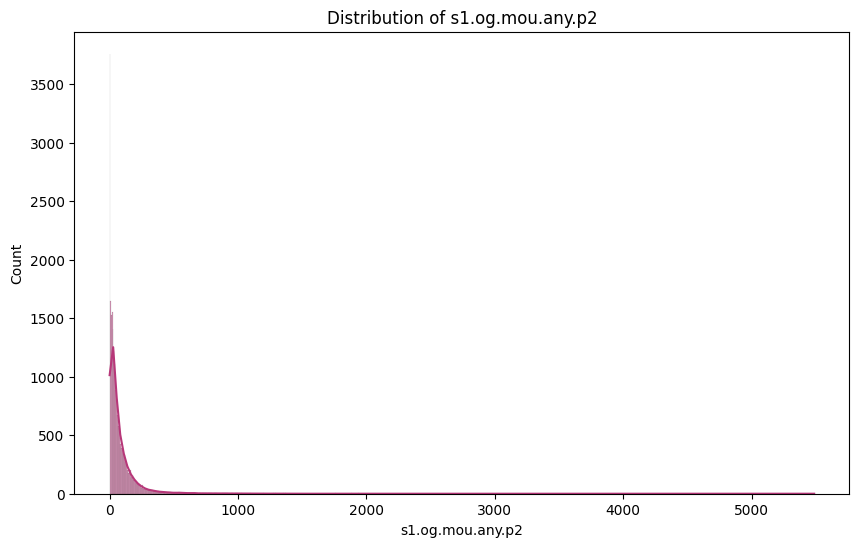

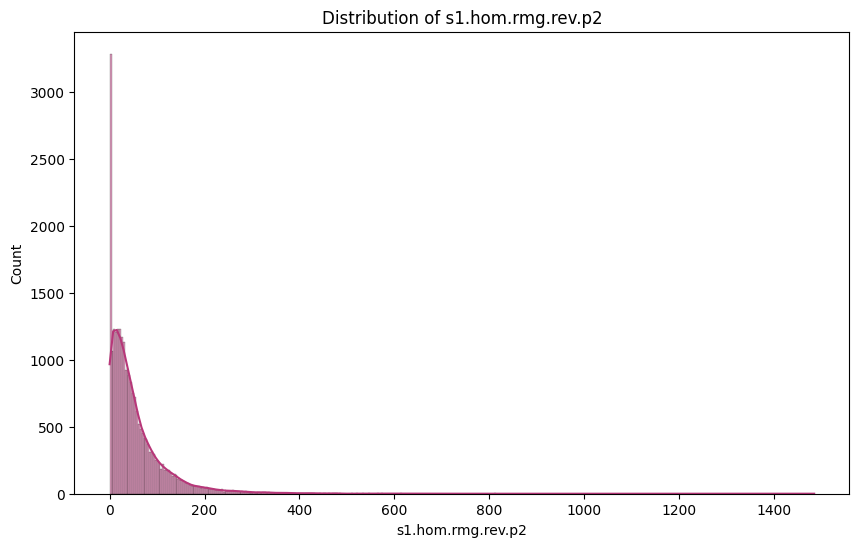

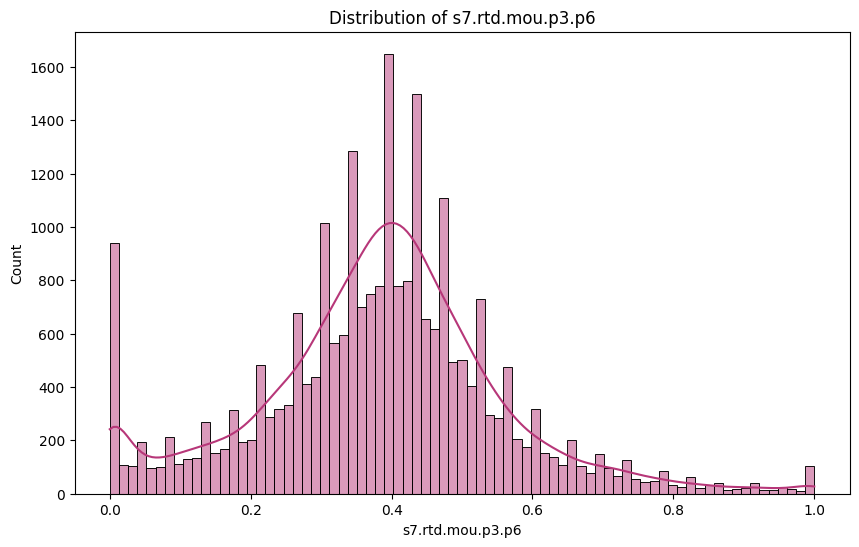

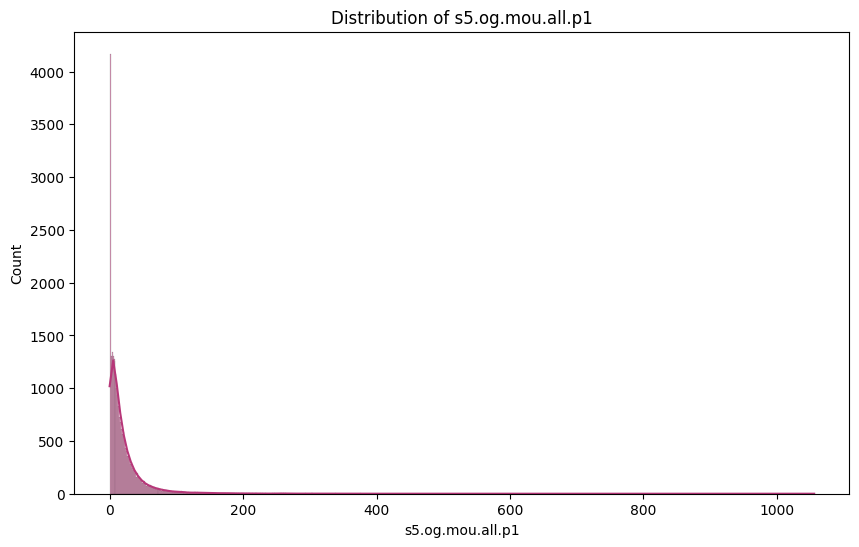

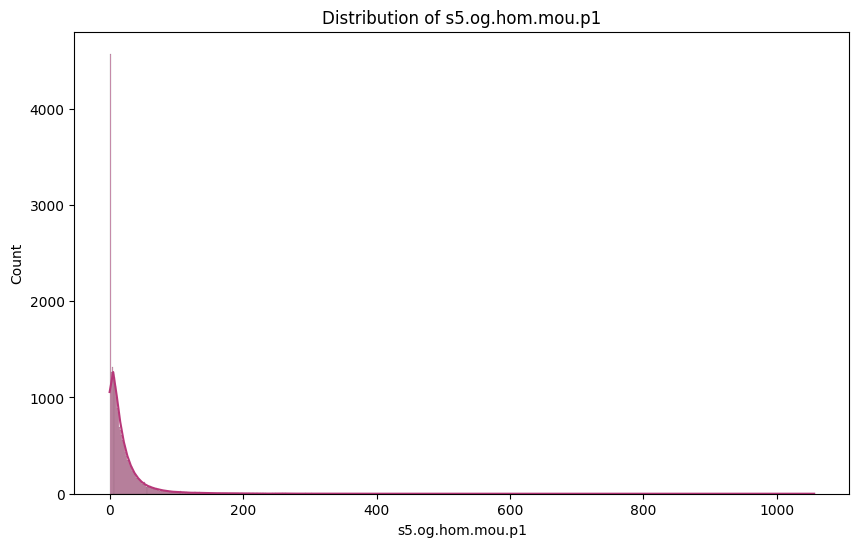

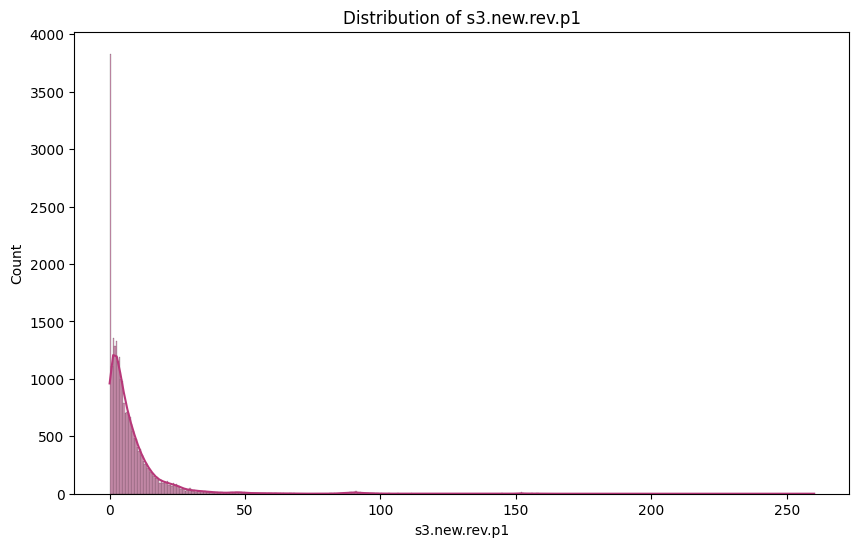

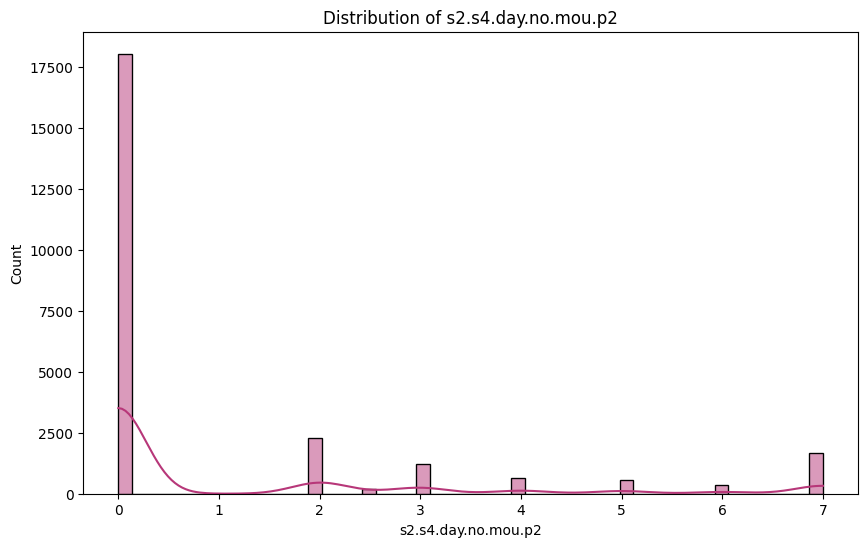

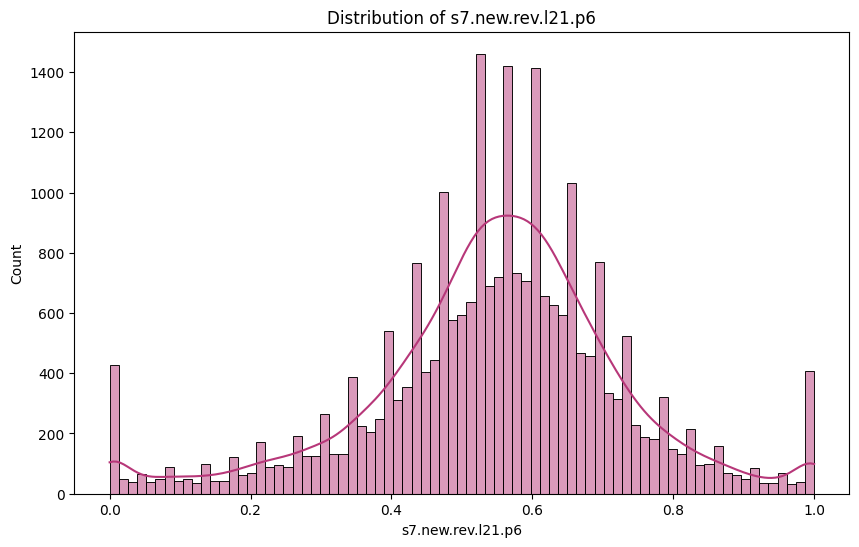

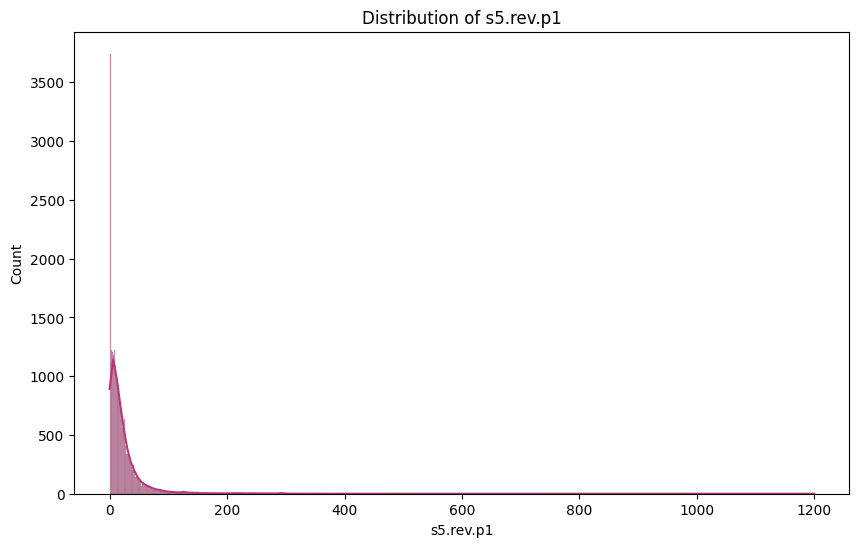

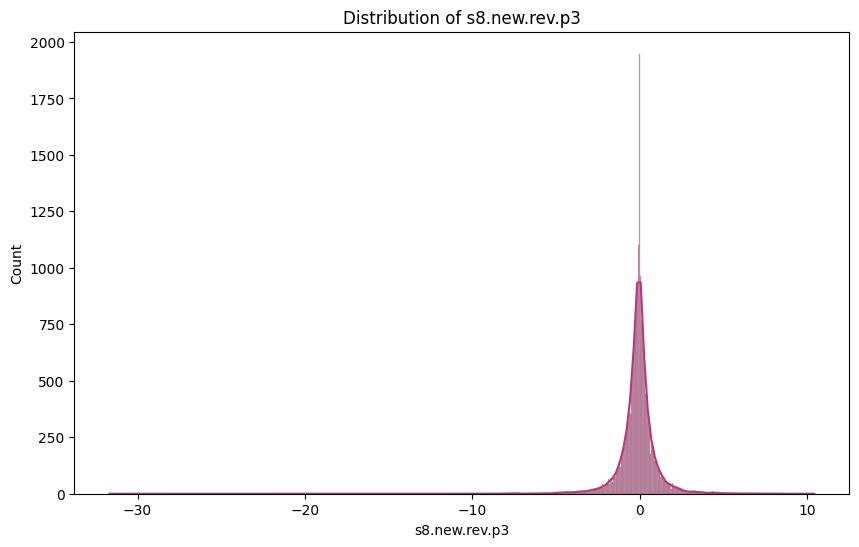

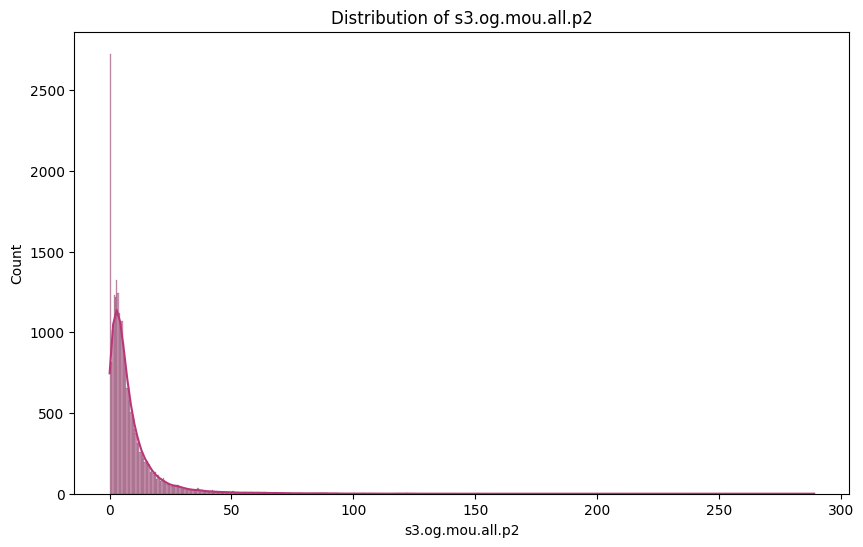

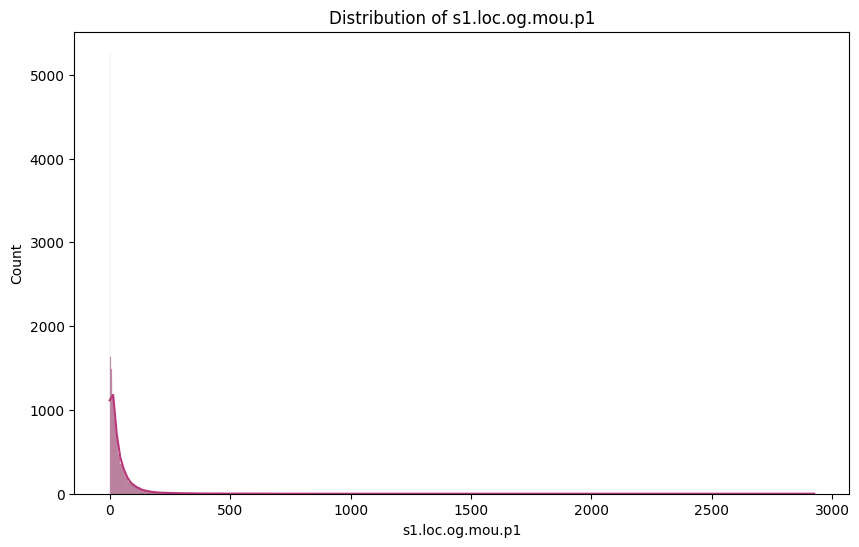

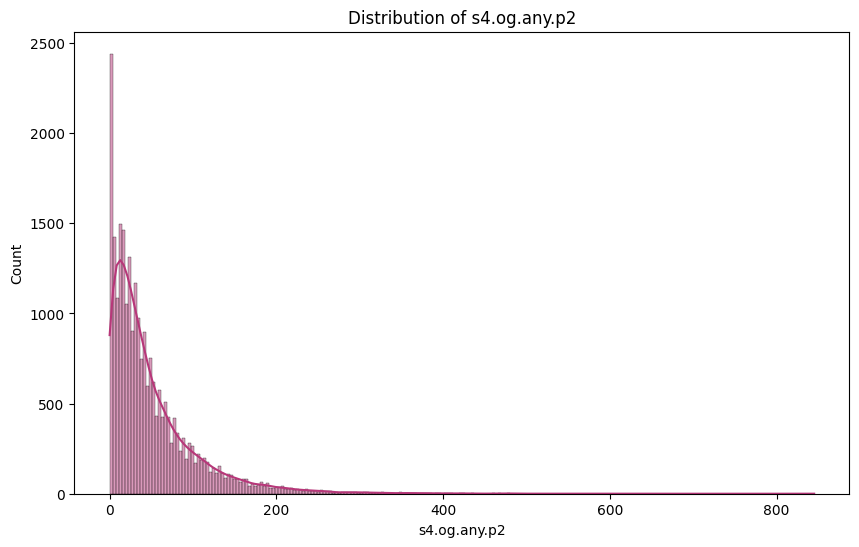

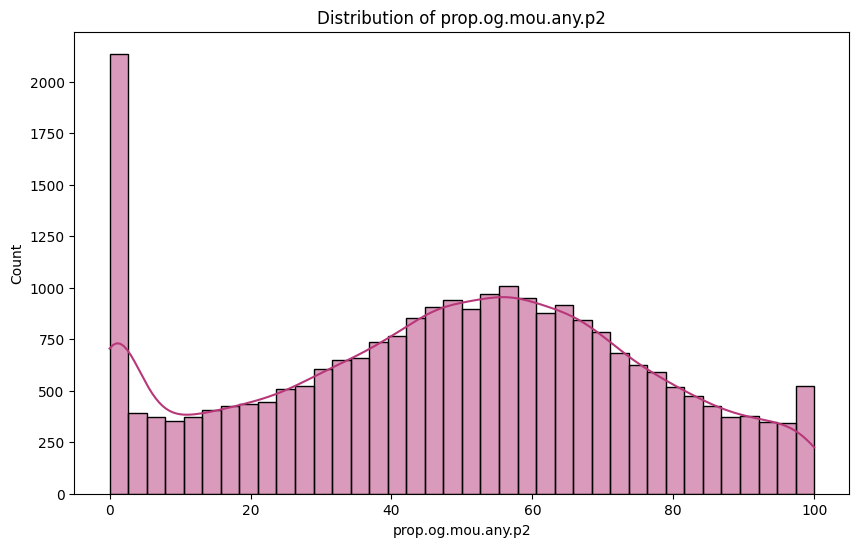

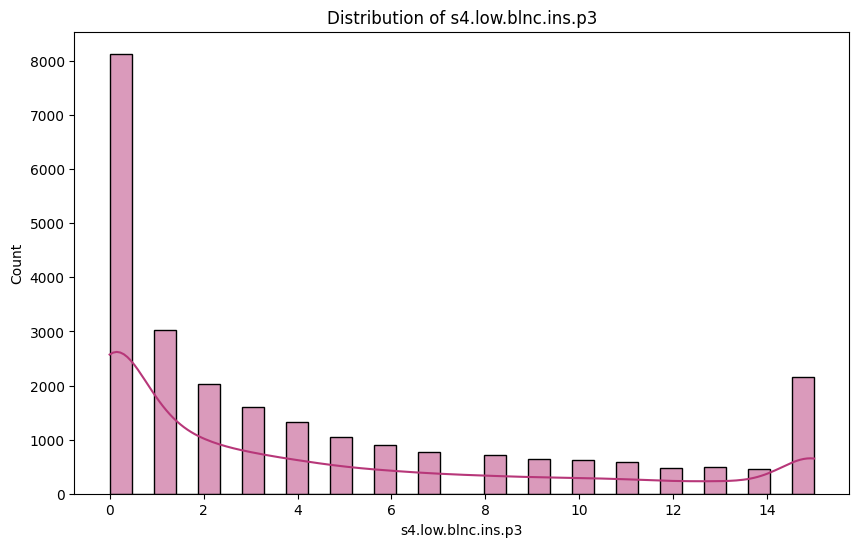

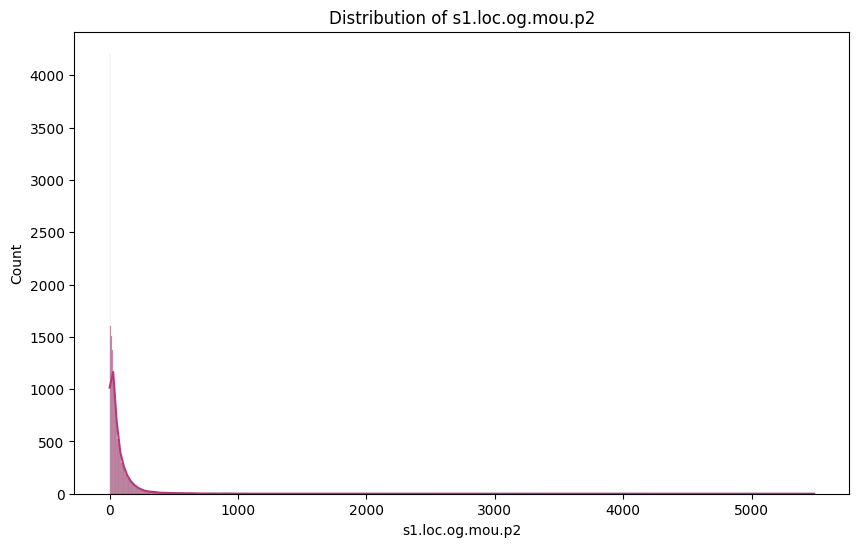

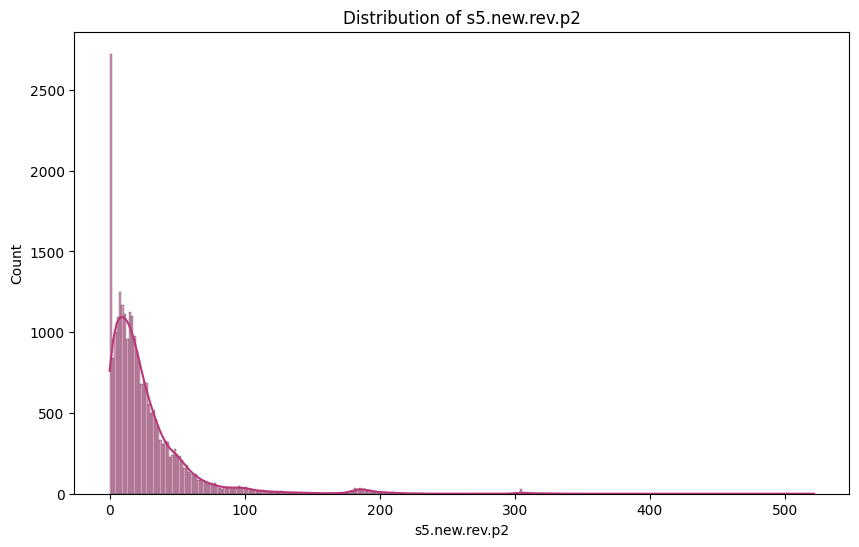

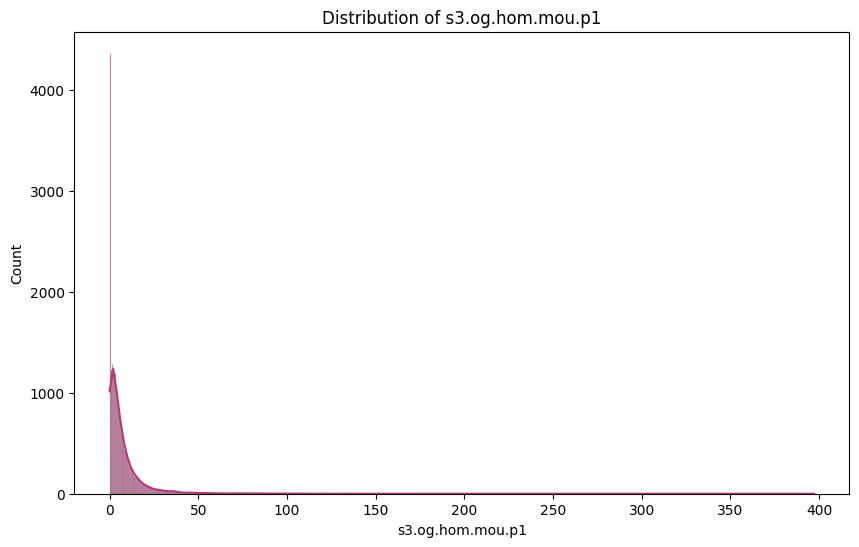

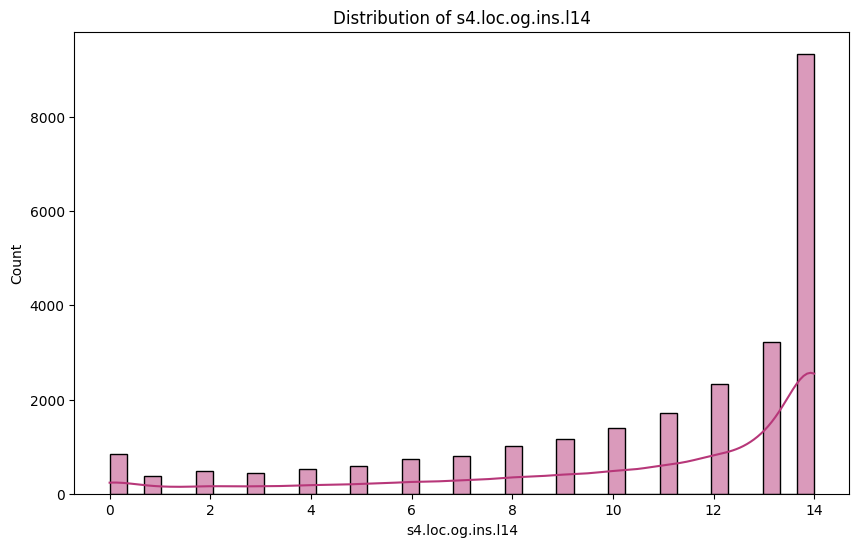

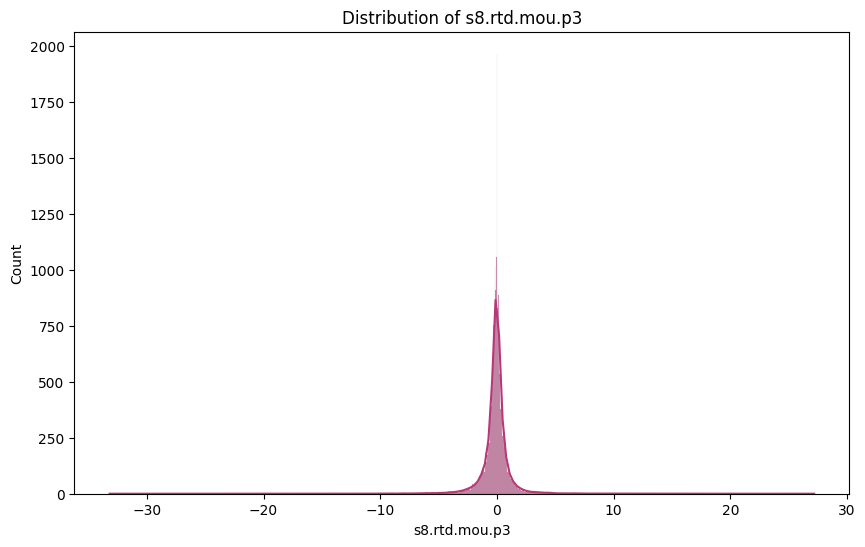

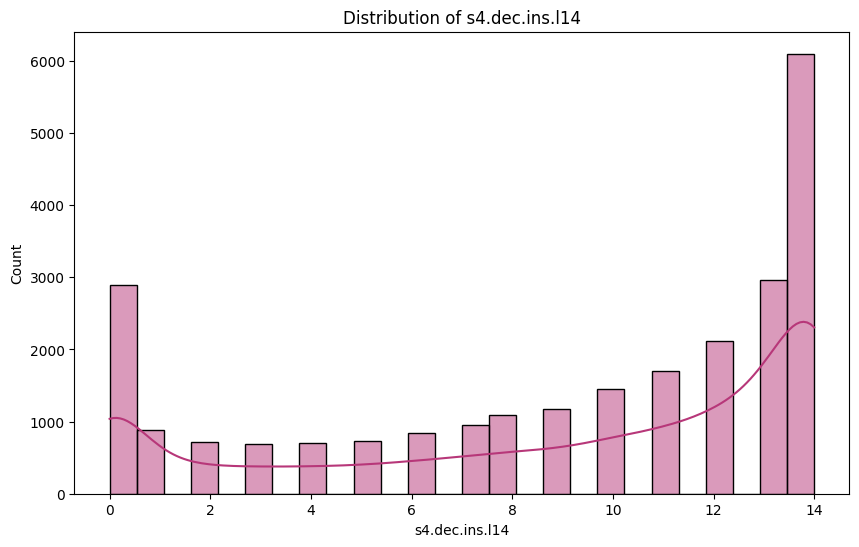

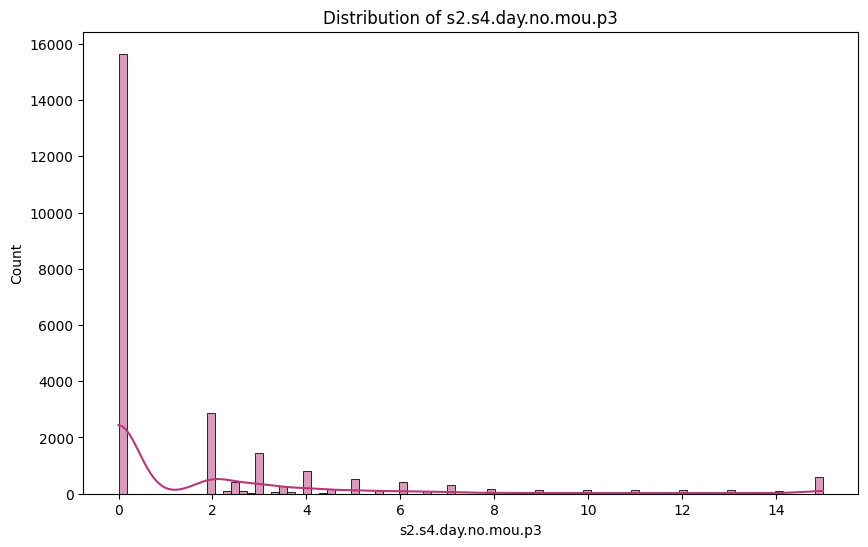

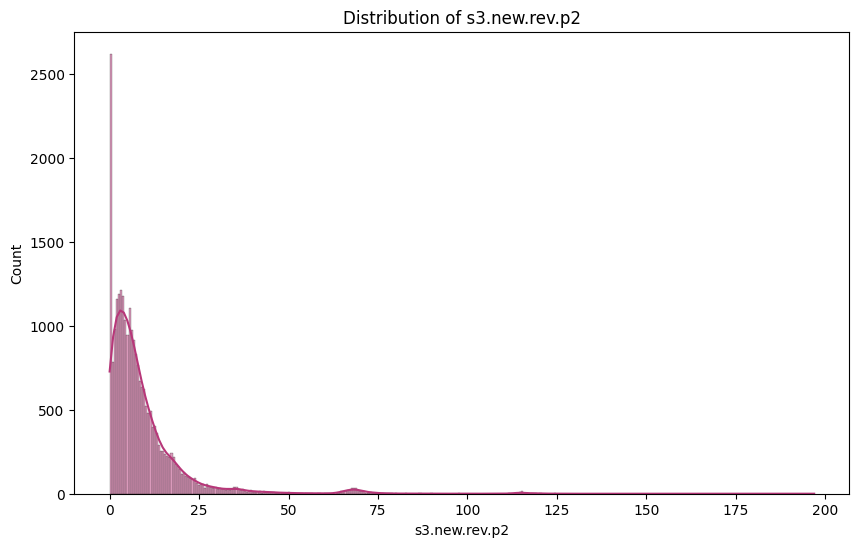

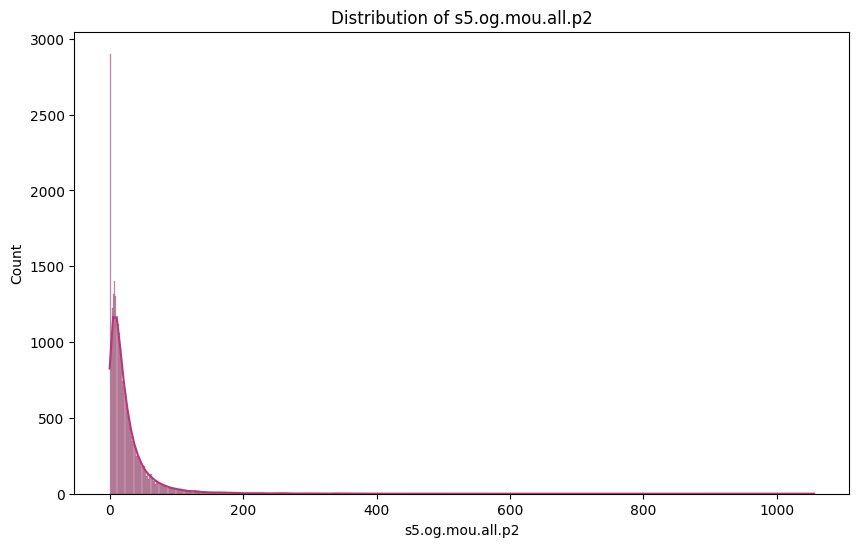

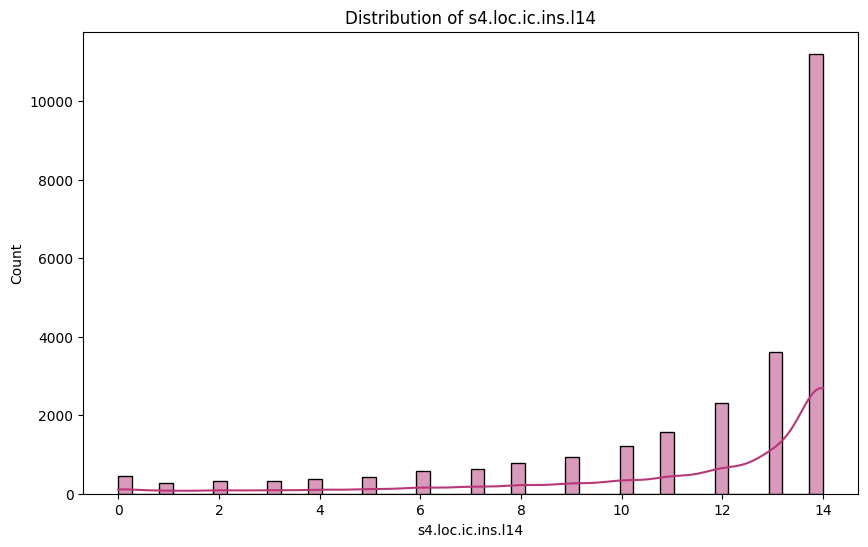

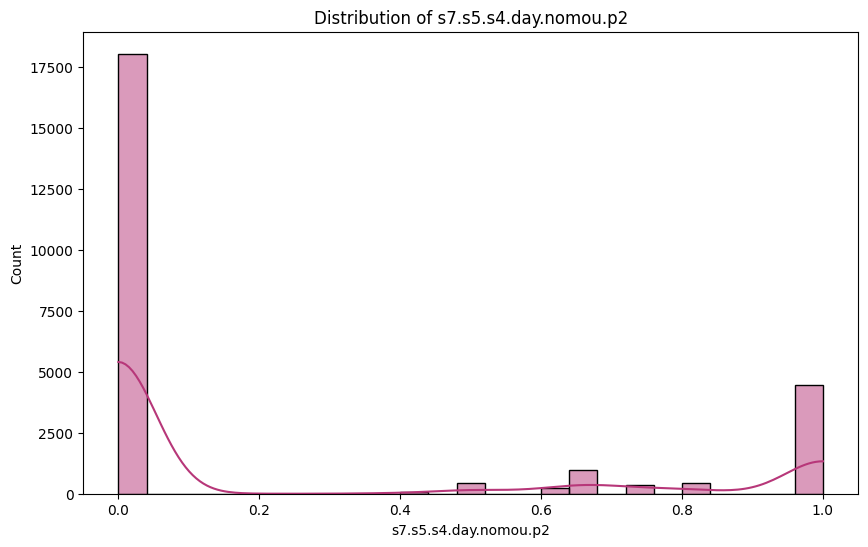

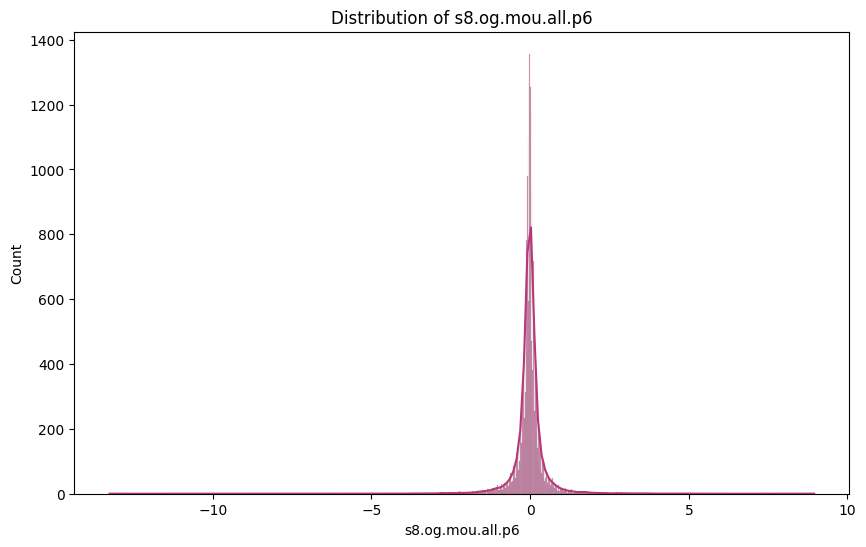

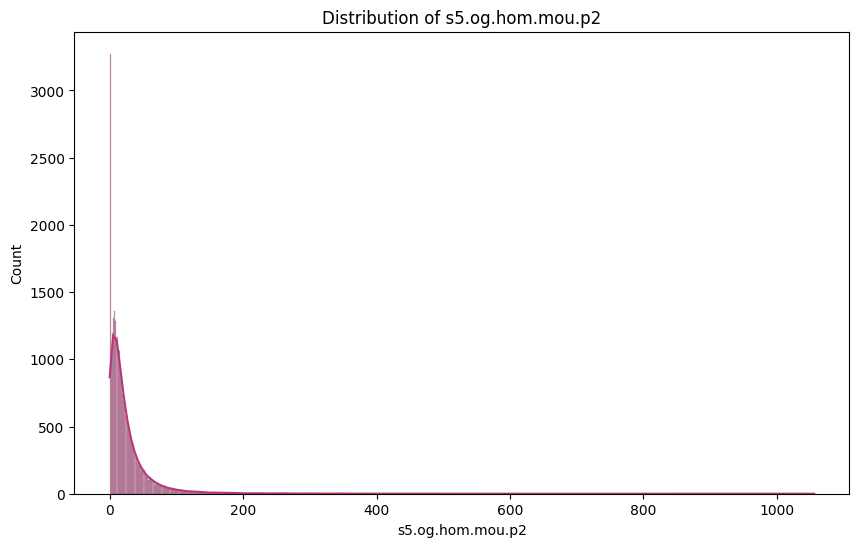

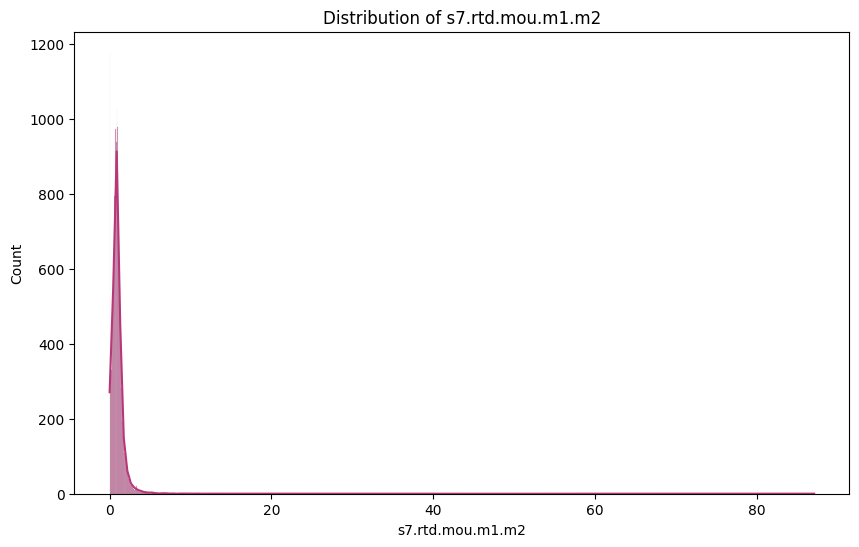

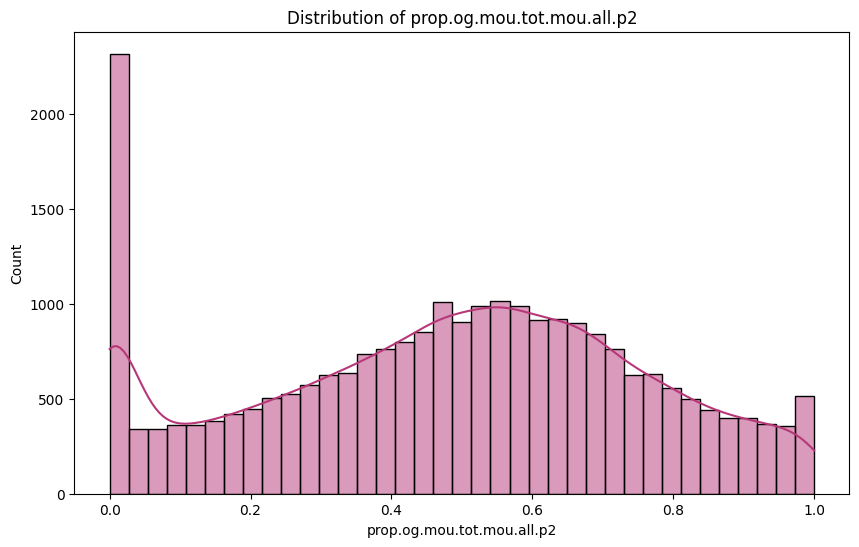

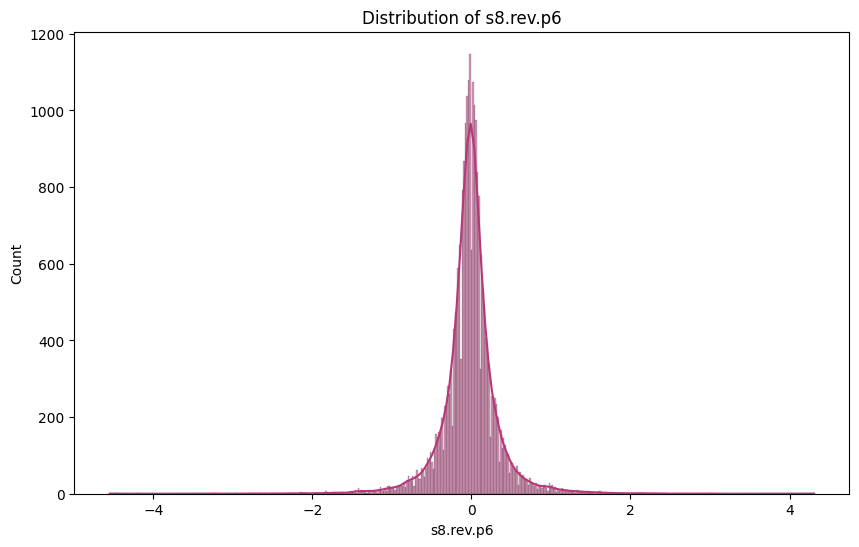

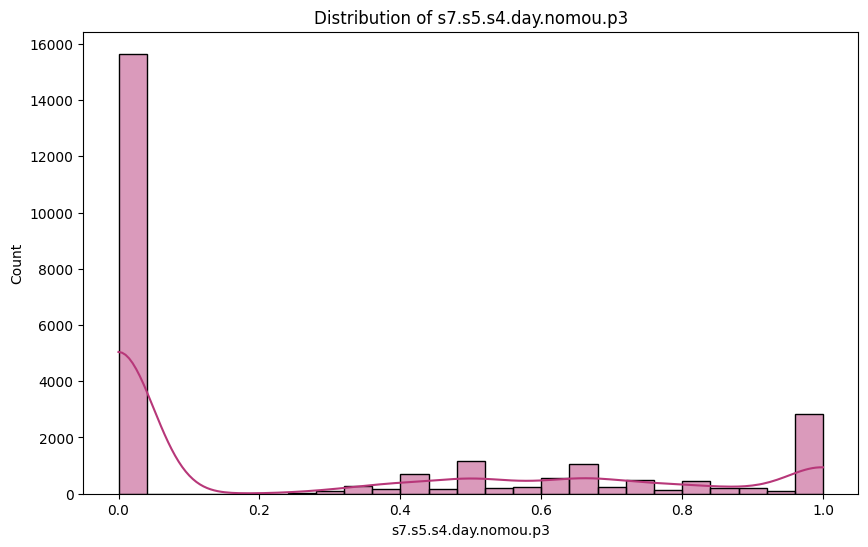

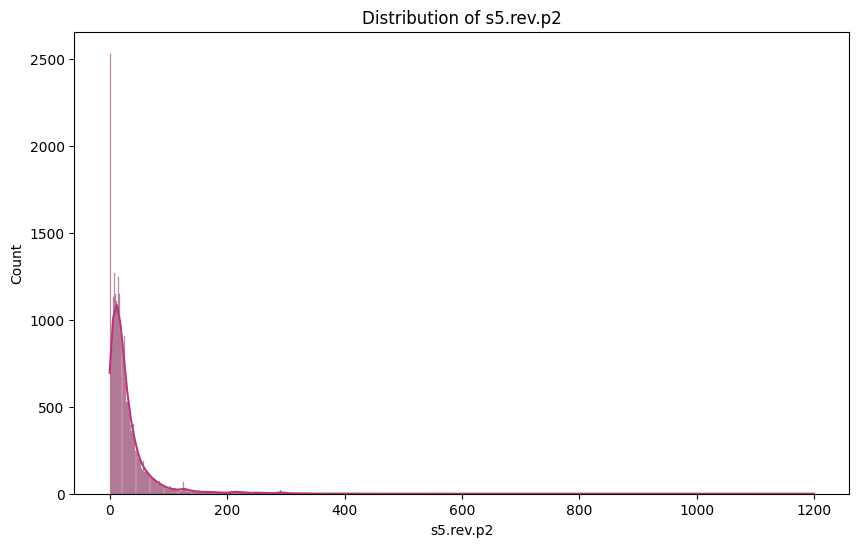

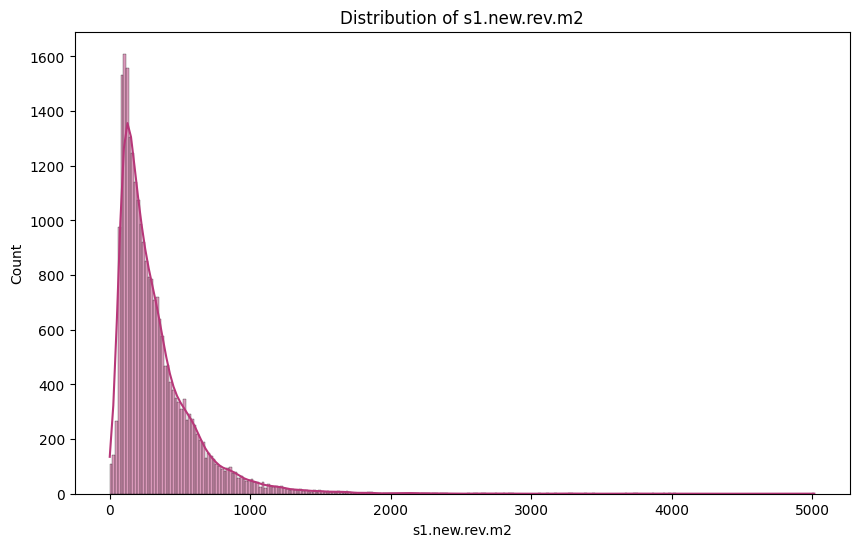

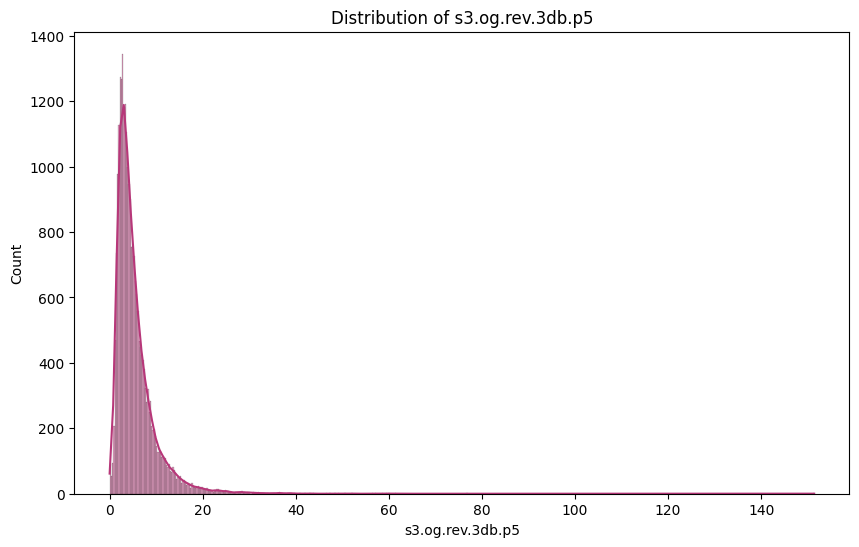

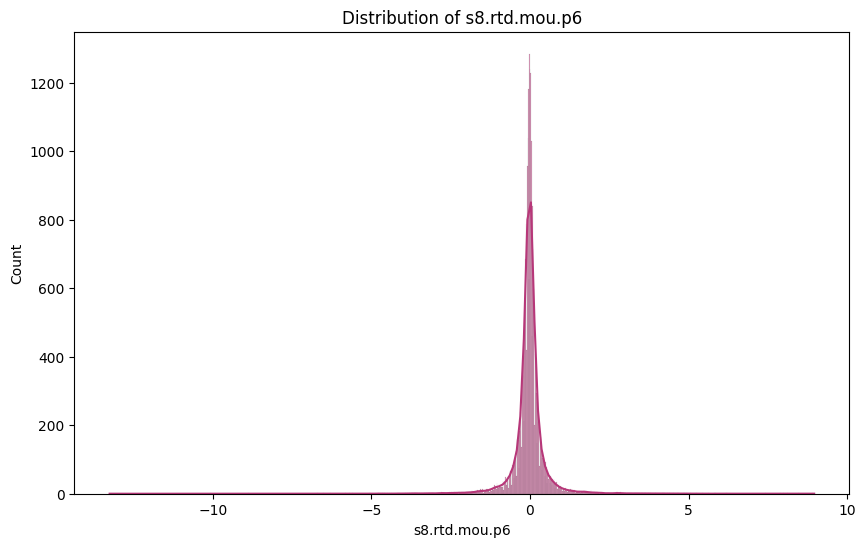

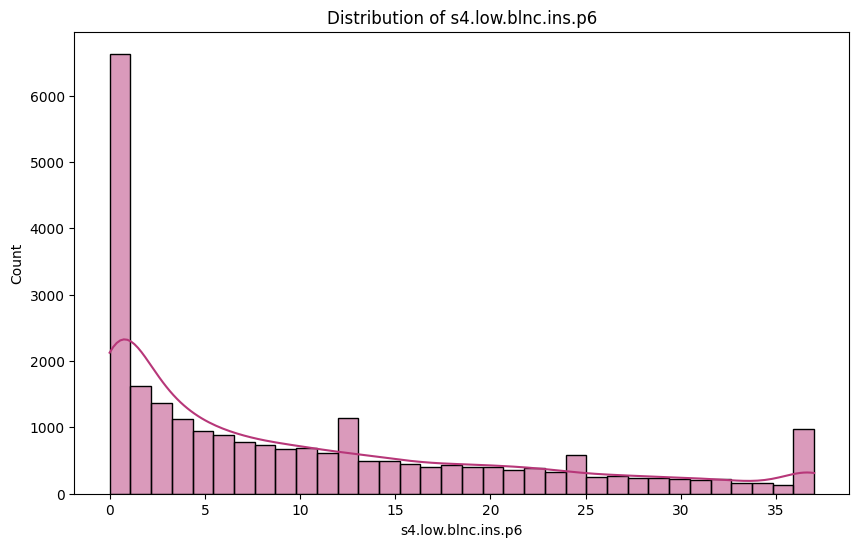

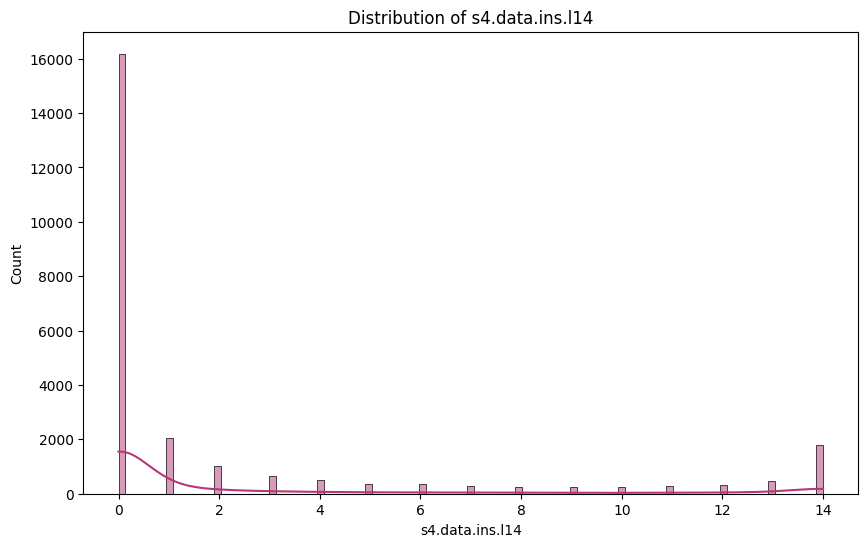

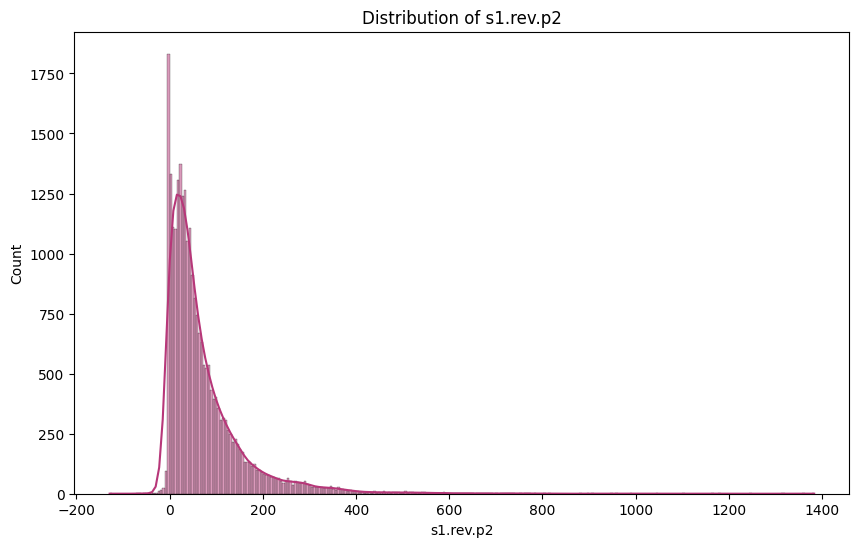

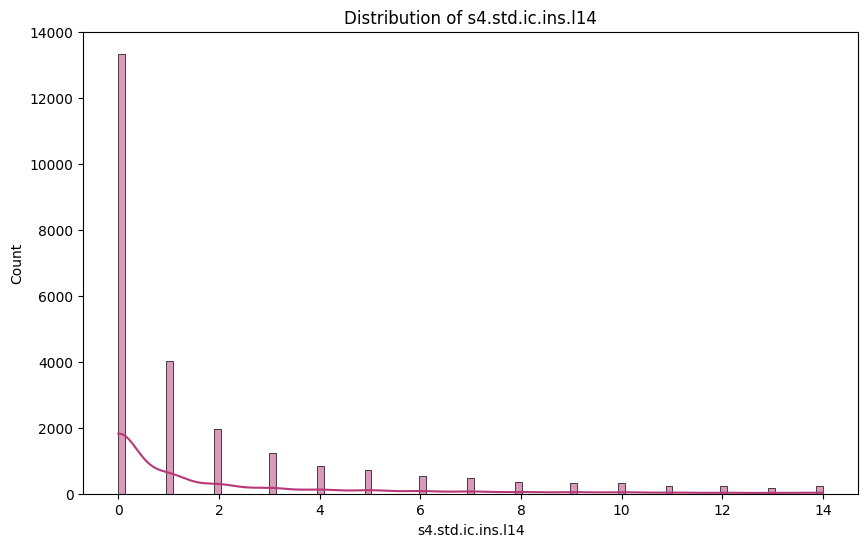

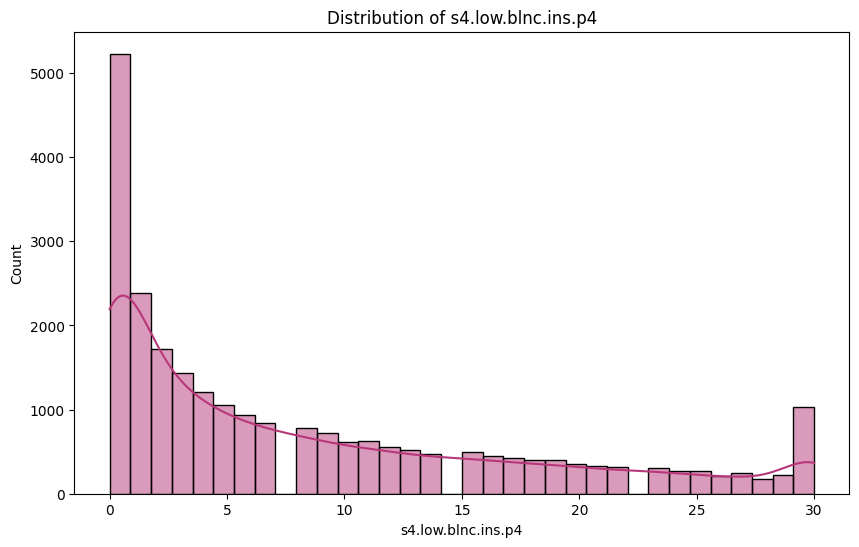

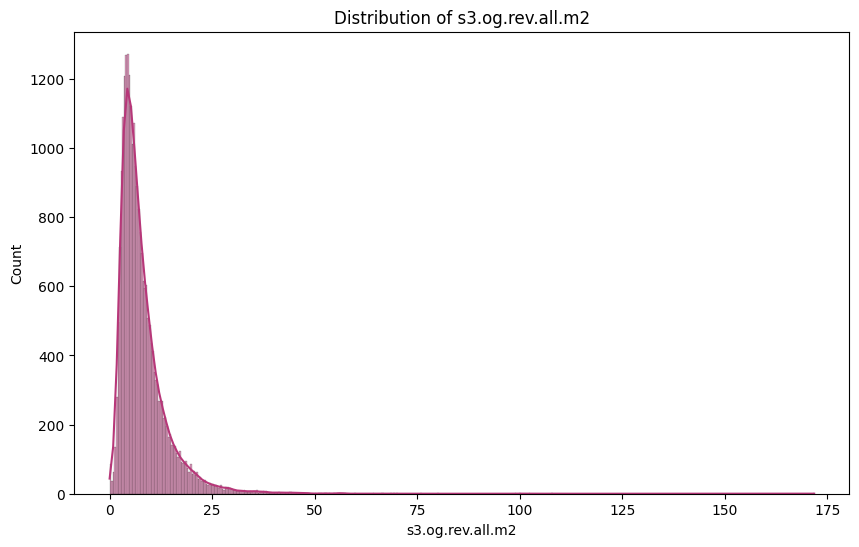

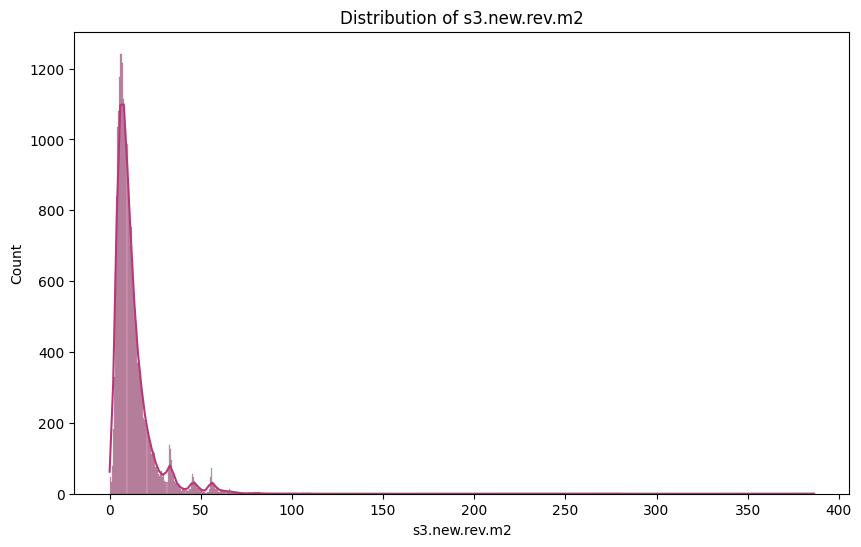

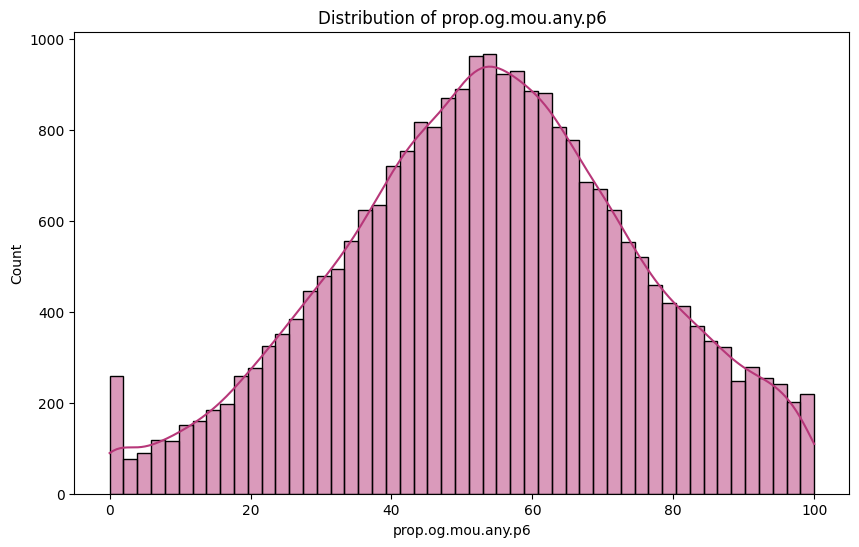

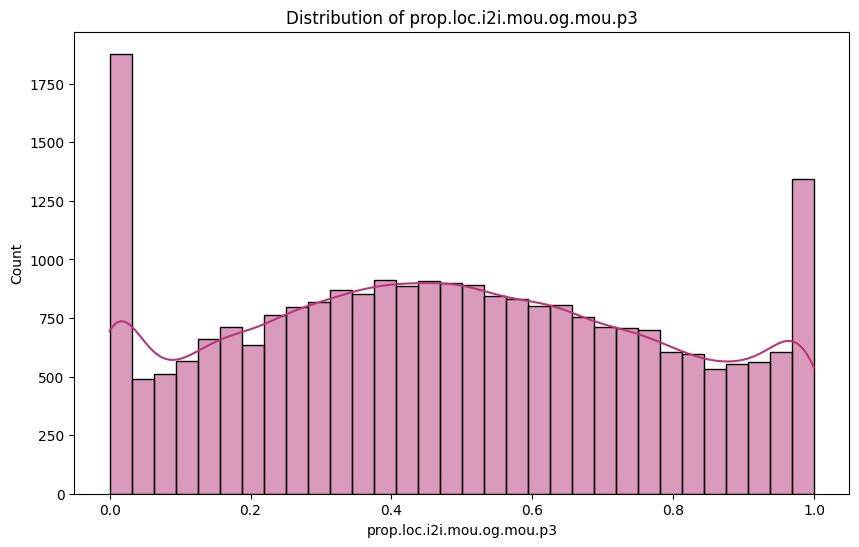

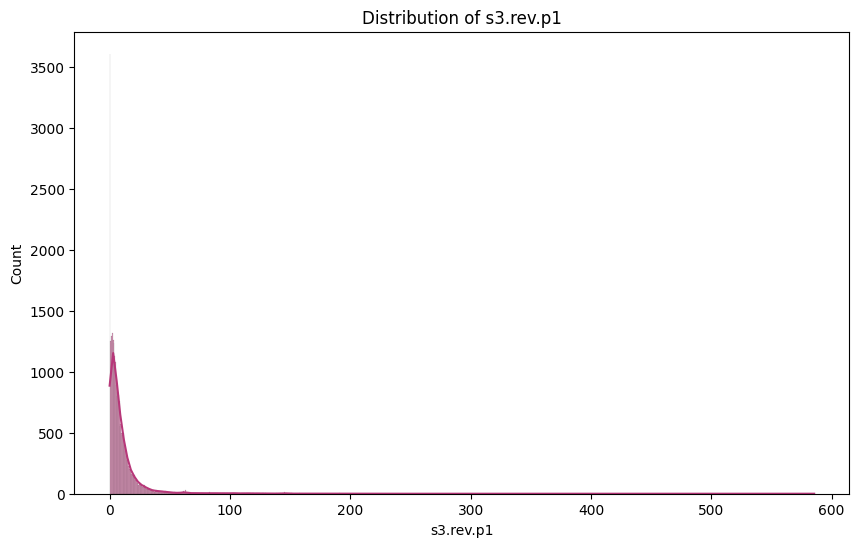

In [ ]:
# Distribution Plot
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col].dropna(), kde=True, color=sns.color_palette('magma', as_cmap=True)(0.5))
    plt.title(f'Distribution of {col}')
    plt.show()

# Standardization

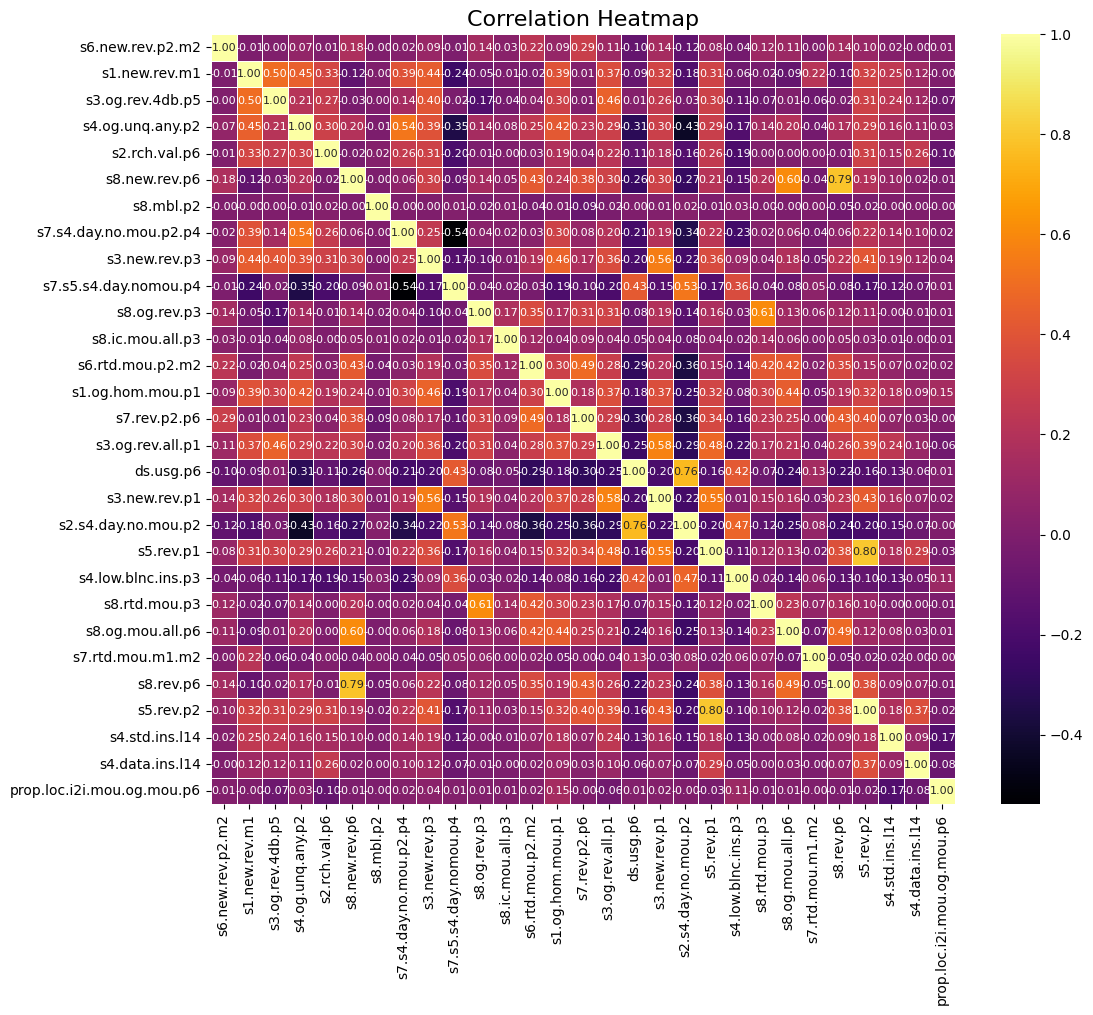

In [ ]:
# Step 7: Remove Highly Correlated Variables
# Compute the correlation matrix for numeric columns only
corr_matrix = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='inferno', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Remove highly correlated variables
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
data = data.drop(columns=[col for col in to_drop if col in data.columns])

In [ ]:
num_rows_after_outlier_treatment = data.shape[0]
print(f'Number of rows remaining after outlier treatment: {num_rows_after_outlier_treatment}')

Number of rows remaining after outlier treatment: 25000


# Multicollinearity (VIF > 5)

---



In [ ]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

while True:
    vif_data = calculate_vif(data.select_dtypes(include=[np.number]))
    max_vif = vif_data['VIF'].max()
    if max_vif > 5:
        max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
        data = data.drop(columns=[max_vif_feature])
    else:
        break

In [ ]:
print(data.columns.tolist())

['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2', 's2.rch.val.p6', 's8.new.rev.p6', 's4.loc.ic.ins.p1', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3', 's7.s5.s4.day.nomou.p4', 's8.og.rev.p3', 's8.ic.mou.all.p3', 'target', 's6.rtd.mou.p2.m2', 's1.og.hom.mou.p1', 's7.rev.p2.p6', 's3.og.rev.all.p1', 'ds.usg.p6', 's4.day.no.mou.p2', 's3.new.rev.p1', 's4.usg.ins.p1', 's2.s4.day.no.mou.p2', 's5.rev.p1', 's5.s4.day.no.mou.p2', 'tot.s4.day.no.mou.p2', 's4.loc.og.ins.p1', 's4.low.blnc.ins.p3', 's8.rtd.mou.p3', 's4.loc.og.ins.p2', 's8.og.mou.all.p6', 's7.rtd.mou.m1.m2', 's8.rev.p6', 's5.rev.p2', 's4.rch.val.gt.30.p2', 's4.std.ins.l14', 's4.low.blnc.ins.p2', 's4.data.ins.l14', 'prop.loc.i2i.mou.og.mou.p6', 's4.dec.ins.p2', 's4.loc.ic.ins.p2']


In [ ]:
num_rows_after_outlier_treatment = data.shape[0]
num_cols = data.shape[1]
print(f'Number of rows remaining after treatment: {num_rows_after_outlier_treatment}')
print(f'Number of columns remaining after treatment: {num_cols}')

Number of rows remaining after treatment: 25000
Number of columns remaining after treatment: 42


In [ ]:
num_cols = data.shape[1]
print(f'Number of columns remaining after treatment: {num_cols}')

Number of columns remaining after treatment: 42




```
# This is formatted as code
```

# Logistic regression

Accuracy: 0.80
Confusion Matrix:
[[3084  353]
 [ 641  922]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.72      0.59      0.65      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.74      0.76      5000
weighted avg       0.80      0.80      0.80      5000



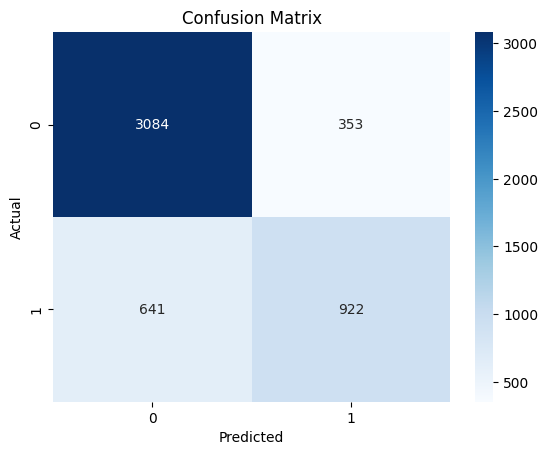

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Hyper parameter tuning**

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Logistic Regression Accuracy: 0.80
Confusion Matrix:
[[3082  355]
 [ 633  930]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.72      0.60      0.65      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.80      0.80      5000



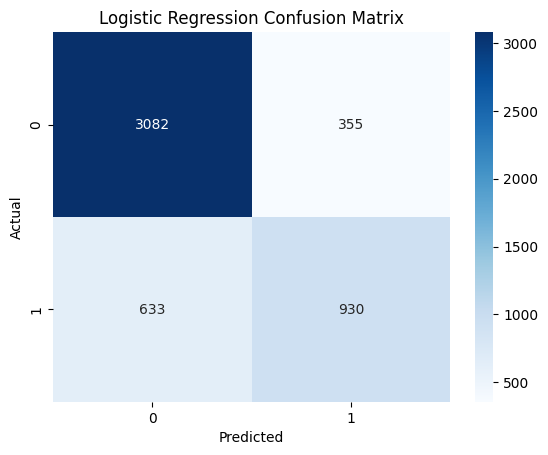

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.01, 0.2, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}


# Perform Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Extract the best model
best_lr_model = grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print('Confusion Matrix:')
print(conf_matrix_lr)
print('Classification Report:')
print(class_report_lr)

# Plot the confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Random Forest and Decision Tree - Before Hyperparameter tuning**

Decision Tree Accuracy: 0.72
Decision Tree Confusion Matrix:
[[2711  726]
 [ 676  887]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3437
           1       0.55      0.57      0.56      1563

    accuracy                           0.72      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.72      0.72      0.72      5000



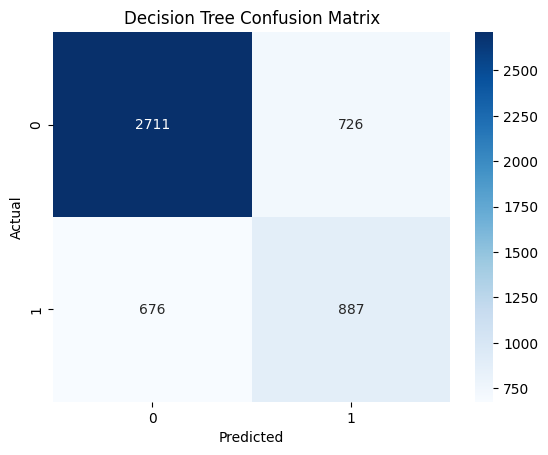

Random Forest Accuracy: 0.81
Random Forest Confusion Matrix:
[[3113  324]
 [ 636  927]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3437
           1       0.74      0.59      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.79      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000



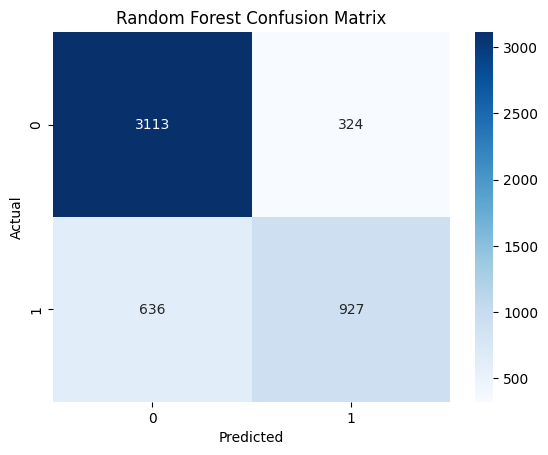

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classification
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print('Decision Tree Confusion Matrix:')
print(conf_matrix_dt)
print('Decision Tree Classification Report:')
print(class_report_dt)

sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest Classification Report:')
print(class_report_rf)

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Accuracy: 0.81
Confusion Matrix:
[[3104  333]
 [ 618  945]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3437
           1       0.74      0.60      0.67      1563

    accuracy                           0.81      5000
   macro avg       0.79      0.75      0.77      5000
weighted avg       0.80      0.81      0.80      5000



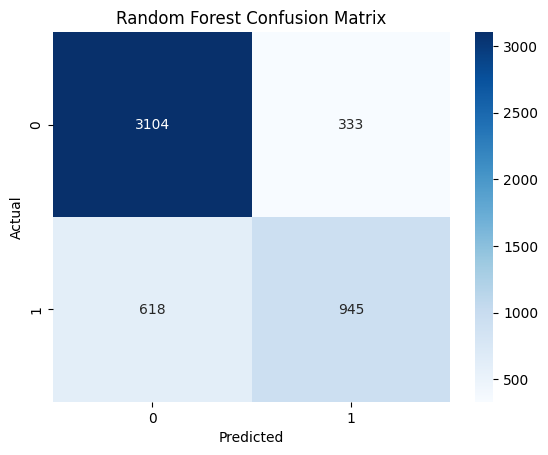

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Decision Tree Accuracy: 0.78
Confusion Matrix:
[[3072  365]
 [ 756  807]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      3437
           1       0.69      0.52      0.59      1563

    accuracy                           0.78      5000
   macro avg       0.75      0.71      0.72      5000
weighted avg       0.77      0.78      0.77      5000



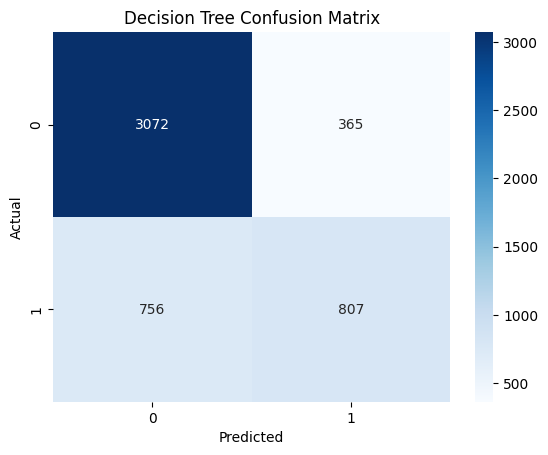

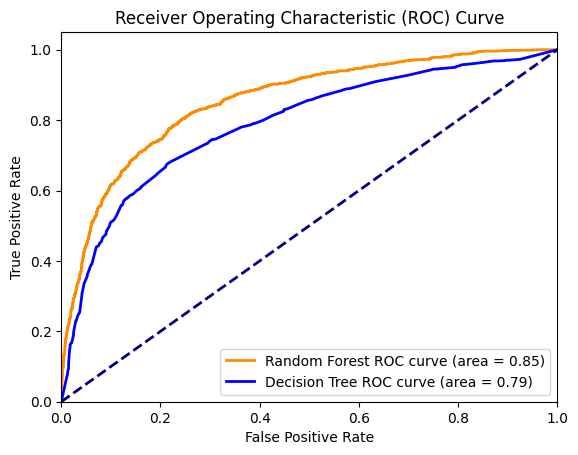

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame
# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Extract the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

# Plot the Random Forest confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

# Extract the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print('Confusion Matrix:')
print(conf_matrix_dt)
print('Classification Report:')
print(class_report_dt)

# Plot the Decision Tree confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curves for both models
y_pred_prob_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_pred_prob_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


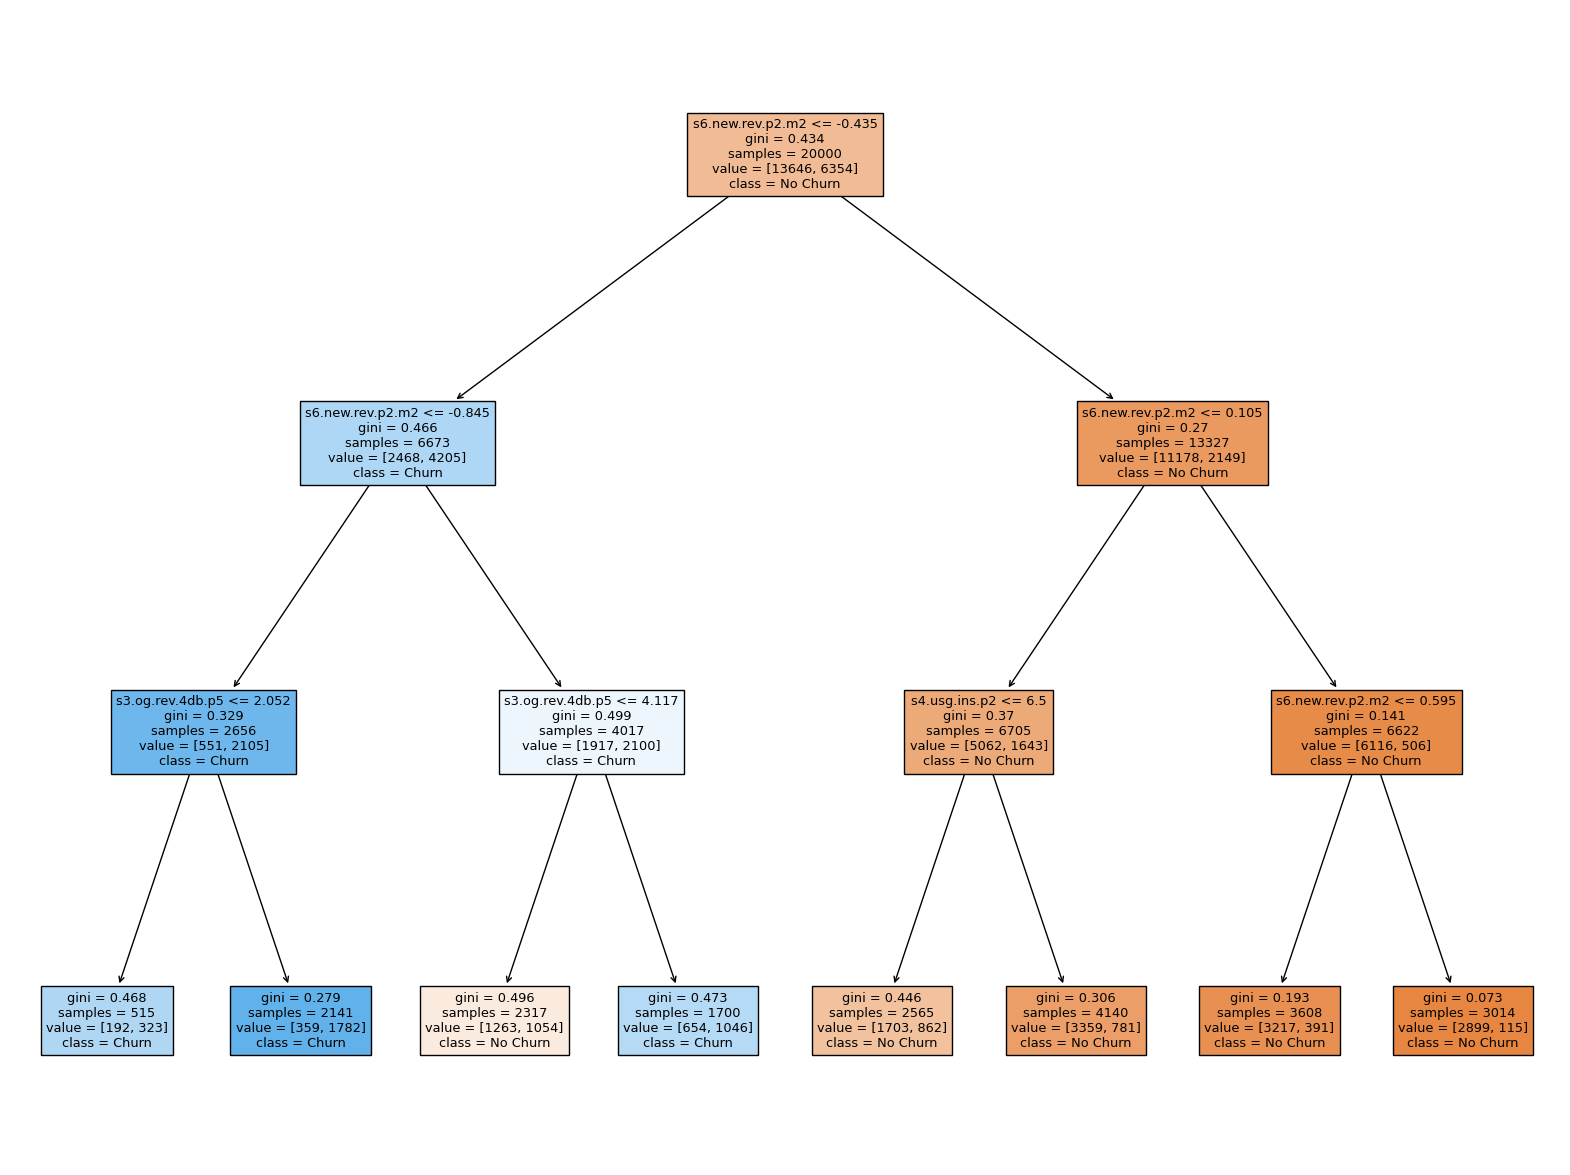

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Select a subset of features
selected_features = [
    's6.new.rev.p2.m2',
    's1.new.rev.m1',
    's3.og.rev.4db.p5',
    's4.usg.ins.p2',
    's4.og.unq.any.p2',
    's2.rch.val.p6',
    's8.new.rev.p6',
    's4.loc.ic.ins.p1'
]

# Assuming 'target' is your target variable for prediction
X = data[selected_features]
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier with constraints to keep the tree small and efficient
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=selected_features, class_names=['No Churn', 'Churn'], filled=True)
plt.show()
